In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import pickle

-----------------------------Integer Experiments------------------------------------------------------------------------------------------------------------------------

In [16]:
dataset = pd.read_csv("../Data/zipf_data_09_12.csv")
dataset = dataset[dataset["Bits Available"]>=4]
dataset = dataset[dataset["Bits Available"]<=14]
three_filter_bloom = dataset[dataset["Num Layers"]==3]
learned_bloom = pd.read_csv("../Data/learned_bloom_firehose_data_2.csv")

In [284]:
with open("../Data/learned_bloom_fprs_integers.p", "rb") as f:
    learned_bloom_fpr = pickle.load(f)

In [285]:
with open("../Data/learned_bloom_sizes_integers.p", "rb") as f:
    learned_bloom_size = pickle.load(f)

In [34]:
bloom_filter_fpr = np.geomspace(.5, .001, 20)
bloom_filter_size = 1.44*np.log2(1/bloom_filter_fpr)
bloom_filter_fpr_linear = np.linspace(.5, .001, 20)
bloom_filter_size_linear = 1.44*np.log2(1/bloom_filter_fpr_linear)


In [35]:
bloom_filter_fpr

array([0.5       , 0.36051136, 0.25993688, 0.18742039, 0.13513436,
       0.09743494, 0.07025281, 0.05065387, 0.03652259, 0.02633362,
       0.01898714, 0.01369016, 0.00987091, 0.00711715, 0.00513163,
       0.00370002, 0.0026678 , 0.00192354, 0.00138692, 0.001     ])

In [37]:
bloom_filter_size

array([ 1.44      ,  2.11951207,  2.79902414,  3.47853622,  4.15804829,
        4.83756036,  5.51707243,  6.1965845 ,  6.87609658,  7.55560865,
        8.23512072,  8.91463279,  9.59414487, 10.27365694, 10.95316901,
       11.63268108, 12.31219315, 12.99170523, 13.6712173 , 14.35072937])

In [18]:
three_filter_bloom_00 = three_filter_bloom[three_filter_bloom["Zipf Parameter"]== 0]
three_filter_bloom_50 = three_filter_bloom[three_filter_bloom["Zipf Parameter"]==.5]
three_filter_bloom_75 = three_filter_bloom[three_filter_bloom["Zipf Parameter"]==.75]
three_filter_bloom_1 = three_filter_bloom[three_filter_bloom["Zipf Parameter"]==1.02]
three_filter_bloom_125 = three_filter_bloom[three_filter_bloom["Zipf Parameter"]==1.25]

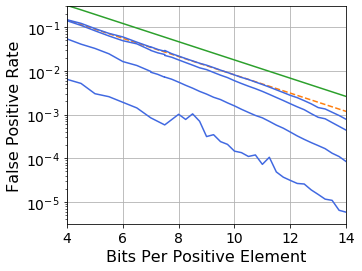

In [25]:
plt.figure(figsize=[5,4])
plt.plot(bloom_filter_size, bloom_filter_fpr, label="Traditional Filter", linestyle="--", color="tab:orange")
plt.plot(three_filter_bloom_50["Bits Available"],three_filter_bloom_50["Total FPR"], label = "Stacked Filter", color="royalblue")
plt.plot(three_filter_bloom_75["Bits Available"],three_filter_bloom_75["Total FPR"], color="royalblue")
plt.plot(three_filter_bloom_1["Bits Available"],three_filter_bloom_1["Total FPR"], color="royalblue")
plt.plot(three_filter_bloom_125["Bits Available"],three_filter_bloom_125["Total FPR"],  color="royalblue")
plt.plot(learned_bloom["Bits Per Element"],learned_bloom["Total FPR"], label = "Learned Bloom Filter", color="tab:green")
plt.yscale("log")
plt.ylabel("False Positive Rate", fontsize=16)
plt.ylim(ymax = .3, ymin=10**-5.5)
plt.xlim(xmin=4, xmax=14)
plt.xlabel("Bits Per Positive Element", fontsize=16)
#plt.legend(loc="lower left", prop={'size':11}, frameon=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.savefig('../Figures/Synthetic_FPR_Bloom.pdf', bbox_inches='tight')
plt.show()

In [9]:
flex_filter_bloom_50 = pd.read_csv("../Data/stacked_filters_layers_flex_050.csv")
flex_filter_bloom_75 = pd.read_csv("../Data/stacked_filters_layers_flex_075.csv")
flex_filter_bloom_1 = pd.read_csv("../Data/stacked_filters_layers_flex_100.csv")
flex_filter_bloom_125 = pd.read_csv("../Data/stacked_filters_layers_flex_125.csv")

In [10]:
print(flex_filter_bloom_75.columns)

Index(['Number Of Positive Elements', 'Negative Sample Size', 'Zipf Parameter',
       'Negative Universe Size', 'Number of Known Negatives Available',
       'Number of Known Negatives Chosen', 'Psi', 'Bits Available',
       'Equal Fprs', 'Num Layers', 'Used Bits', 'Total FPR', 'Known FPR',
       'Unknown FPR', 'Construction Time', 'Positive Lookup Time',
       'Negative Lookup Time', 'Filter Checks For Positive',
       'Filter Checks For Negative', 'EFPB'],
      dtype='object')


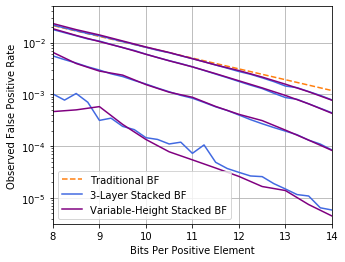

In [85]:
plt.figure(figsize=[5,4])
plt.plot(bloom_filter_size, bloom_filter_fpr, label="Traditional BF", linestyle="--", color="tab:orange")
plt.plot(three_filter_bloom_50["Bits Available"],three_filter_bloom_50["Total FPR"], label = "3-Layer Stacked BF", color="royalblue")
plt.plot(three_filter_bloom_75["Bits Available"],three_filter_bloom_75["Total FPR"], color="royalblue")
plt.plot(three_filter_bloom_1["Bits Available"],three_filter_bloom_1["Total FPR"], color="royalblue")
plt.plot(three_filter_bloom_125["Bits Available"],three_filter_bloom_125["Total FPR"],  color="royalblue")
plt.plot(flex_filter_bloom_50["Bits Available"],flex_filter_bloom_50["Total FPR"], label = "Variable-Height Stacked BF", color="purple")
plt.plot(flex_filter_bloom_75["Bits Available"],flex_filter_bloom_75["Total FPR"], color="purple")
plt.plot(flex_filter_bloom_1["Bits Available"],flex_filter_bloom_1["Total FPR"], color="purple")
plt.plot(flex_filter_bloom_125["Bits Available"],flex_filter_bloom_125["Total FPR"],  color="purple")
plt.yscale("log")
plt.ylabel("Observed False Positive Rate")
plt.ylim(ymax = .05, ymin=10**-5.5)
plt.xlabel("Bits Per Positive Element")
plt.xlim(xmin=8, xmax=14)
plt.legend(loc="lower left")
plt.grid()
plt.savefig('../Figures/FPR_Bloom_Flex.pdf', bbox_inches='tight')
plt.show()

In [12]:
print(flex_filter_bloom_125["Num Layers"])

0     3
1     5
2     3
3     3
4     5
5     3
6     3
7     3
8     7
9     5
10    7
11    5
12    5
13    5
14    5
15    7
16    7
Name: Num Layers, dtype: int64


No handles with labels found to put in legend.


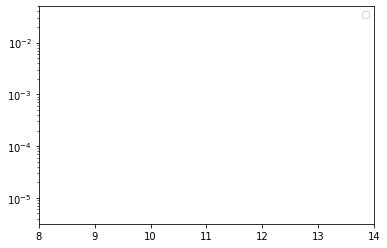

In [13]:
plt.yscale("log")
#plt.ylabel("Filters' False Positive Rate")
plt.ylim(ymax = .05, ymin=10**-5.5)
#plt.xlabel("Filters' Memory (Bits Per Element)")
plt.xlim(xmin=8, xmax=14)
#plt.title("Stacked Filters")
plt.legend(ncol=1, prop={'size':9})
#plt.grid()
plt.show()

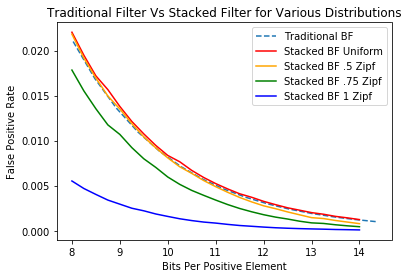

In [14]:
#plt.figure(figsize=(15,10))
plt.plot(bloom_filter_size, bloom_filter_fpr, label="Traditional BF", linestyle="--")
plt.plot(three_filter_bloom_00["Bits Available"],three_filter_bloom_00["Total FPR"], label = "Stacked BF Uniform", color="red")
plt.plot(three_filter_bloom_50["Bits Available"],three_filter_bloom_50["Total FPR"], label = "Stacked BF .5 Zipf", color="orange")
plt.plot(three_filter_bloom_75["Bits Available"],three_filter_bloom_75["Total FPR"], label = "Stacked BF .75 Zipf", color="green")
plt.plot(three_filter_bloom_1["Bits Available"],three_filter_bloom_1["Total FPR"], label = "Stacked BF 1 Zipf", color="blue")
plt.ylabel("False Positive Rate")
plt.xlabel("Bits Per Positive Element")
plt.title("Traditional Filter Vs Stacked Filter for Various Distributions")
plt.legend()
plt.show()

In [15]:
standard_perpdata = pd.read_csv("../Data/performance_standard_10_04.csv")
stacked_comp_data = pd.read_csv("../Data/performance_stacked_10_04.csv")

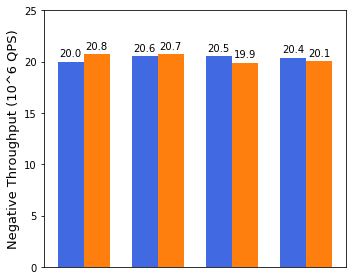

In [52]:
bits = ["8","10","12","14"]
standard_negative_lookups_per_sec =  1/(standard_comp_data["Negative Lookup Time"])
stacked_negative_lookup_per_sec =  1/(stacked_comp_data["Negative Lookup Time"])

x = np.arange(len(bits))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width/2, stacked_negative_lookup_per_sec, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x + width/2, standard_negative_lookups_per_sec, width, label='Traditional Bloom Filter',color="tab:orange")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Negative Throughput (10^6 QPS)', fontsize=13)
ax.set_ylim(ymax=25)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


plt.tick_params(
    axis='x',  
    which='both',
    bottom=False,
    top=False,        
    labelbottom=False)
fig.tight_layout()
plt.savefig('../Figures/Negative_Queries_Bloom.pdf', bbox_inches='tight')
plt.show()


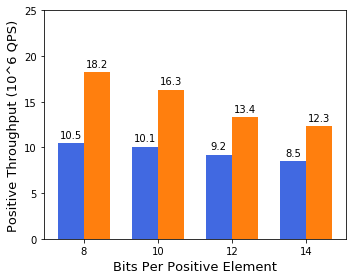

In [51]:
bits = ["8","10","12","14"]
standard_positive_lookups_per_sec =  1/(standard_comp_data["Positive Lookup Time"])
stacked_positive_lookups_per_sec =  1/(stacked_comp_data["Positive Lookup Time"])

x = np.arange(len(bits))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width/2, stacked_positive_lookups_per_sec, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x + width/2, standard_positive_lookups_per_sec, width, label='Traditional Bloom Filter',color="tab:orange")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Positive Throughput (10^6 QPS)', fontsize=13)
ax.set_xlabel('Bits Per Positive Element', fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(bits)
ax.set_ylim(ymax=25)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('../Figures/Positive_Queries_Bloom.pdf', bbox_inches='tight')

plt.show()


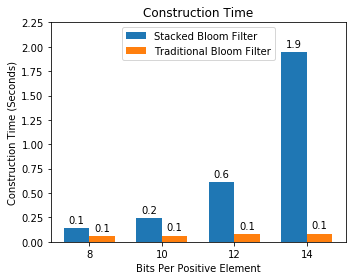

In [245]:
bits = ["8","10","12","14"]
standard_inserts_per_sec =  standard_comp_data["Construction Time"]
stacked_inserts_per_sec =  stacked_comp_data["Construction Time"]

x = np.arange(len(bits))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width/2, stacked_inserts_per_sec, width, label='Stacked Bloom Filter')
rects2 = ax.bar(x + width/2, standard_inserts_per_sec, width, label='Traditional Bloom Filter')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Construction Time (Seconds)')
ax.set_xlabel('Bits Per Positive Element')
ax.set_title('Construction Time')
ax.set_xticks(x)
ax.set_xticklabels(bits)
ax.set_ylim(ymax=2.25)
ax.legend(loc="upper center")


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


In [69]:
varied_size_data = pd.read_csv("../Data/size_data_09_12.csv")
#varied_size_data = varied_size_data[varied_size_data["Total FPR"]!=0]
positives_00 =  varied_size_data[varied_size_data["Zipf Parameter"]==0]
positives_50 =  varied_size_data[varied_size_data["Zipf Parameter"]==.5]
positives_75 =  varied_size_data[varied_size_data["Zipf Parameter"]==.75]
positives_100 =  varied_size_data[varied_size_data["Zipf Parameter"]==1.02]

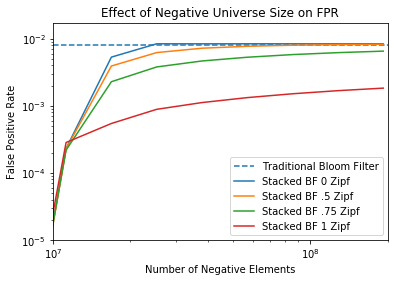

In [97]:
plt.axhline(0.008193722, label="Traditional Bloom Filter", linestyle = "--")
plt.plot(positives_00["Negative Universe Size"], positives_00["Total FPR"], label="Stacked BF 0 Zipf")
plt.plot(positives_50["Negative Universe Size"], positives_50["Total FPR"], label="Stacked BF .5 Zipf")
plt.plot(positives_75["Negative Universe Size"], positives_75["Total FPR"], label="Stacked BF .75 Zipf")
plt.plot(positives_100["Negative Universe Size"], positives_100["Total FPR"], label="Stacked BF 1 Zipf")
plt.yscale("log")
plt.xscale("log")
plt.axis( ymin = .00001, xmin=10000000, xmax=200000000)
plt.ylabel("False Positive Rate")
plt.xlabel("Number of Negative Elements")
plt.title("Effect of Negative Universe Size on FPR")
plt.legend()
plt.show()

In [148]:
stacked_bloom_050 = pd.read_csv("../Data/EFPB_stacked_bloom_050.csv")
stacked_bloom_075 = pd.read_csv("../Data/EFPB_stacked_bloom_075.csv")
stacked_bloom_100 = pd.read_csv("../Data/EFPB_stacked_bloom_100.csv")
stacked_bloom_125 = pd.read_csv("../Data/EFPB_stacked_bloom_125.csv")

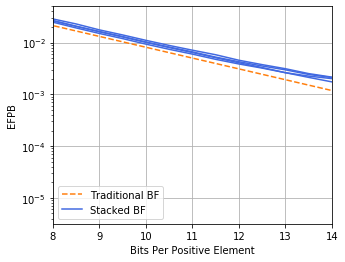

In [189]:
plt.figure(figsize=[5,4])
plt.plot(bloom_filter_size,bloom_filter_fpr, label="Traditional BF", linestyle = "--", color="tab:orange")
plt.plot(stacked_bloom_050["Bits Available"], stacked_bloom_050["EFPB"], label="Stacked BF", color="royalblue")
plt.plot(stacked_bloom_075["Bits Available"], stacked_bloom_075["EFPB"], color="royalblue")
plt.plot(stacked_bloom_100["Bits Available"], stacked_bloom_100["EFPB"], color="royalblue")
plt.plot(stacked_bloom_125["Bits Available"], stacked_bloom_125["EFPB"], color="royalblue")
plt.yscale("log")
plt.ylim(ymax = .05, ymin=10**-5.5)
plt.xlim(xmin=8, xmax=14)
plt.ylabel("EFPB")
plt.xlabel("Bits Per Positive Element")
plt.legend(loc="lower left")
plt.grid()
plt.savefig('../Figures/EFPB_Bloom.pdf', bbox_inches='tight')
plt.show()

In [163]:
zipf_sweep_01 = pd.read_csv("../Data/stacked_zipf_sweep_010.csv")

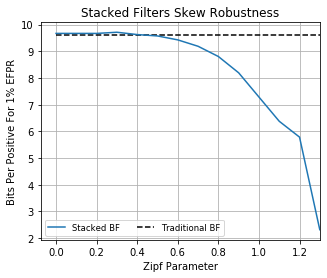

In [184]:
plt.figure(figsize=[5,4])
plt.hlines(9.6,0,1.5, label = "Traditional BF", ls="--")
plt.plot(zipf_sweep_01["Zipf Parameter"], zipf_sweep_01["Used Bits"], label="Stacked BF")
plt.ylabel("Bits Per Positive For 1% EFPR")
plt.xlabel("Zipf Parameter")
plt.xlim(xmax=1.3)
plt.title("Stacked Filters Skew Robustness")
plt.legend(ncol=2, loc="lower left",prop={'size': 8.5})
plt.grid()
plt.show()

In [691]:
zipf_sweep_010 = pd.read_csv("../Data/stacked_zipf_sweep_010_REDO.csv")
zipf_sweep_005 = pd.read_csv("../Data/stacked_zipf_sweep_005.csv")
zipf_sweep_001 = pd.read_csv("../Data/stacked_zipf_sweep_001.csv")

In [694]:
zipf_sweep_010 = pd.read_csv("../Data/stacked_zipf_sweep_010_REDO.csv")
zipf_sweep_005 = pd.read_csv("../Data/stacked_zipf_sweep_005.csv")
zipf_sweep_001 = pd.read_csv("../Data/stacked_zipf_sweep_001.csv")
zipf_sweep_010["Traditional BF Fraction"] = zipf_sweep_010["Used Bits"]/9.6*100
zipf_sweep_005["Traditional BF Fraction"] = zipf_sweep_005["Used Bits"]/11.1*100
zipf_sweep_001["Traditional BF Fraction"] = zipf_sweep_001["Used Bits"]/14.375*100

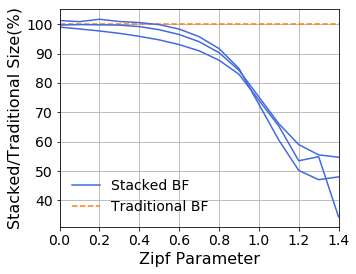

In [777]:
plt.figure(figsize=[5,4])
plt.hlines(100,0,1.5, label = "Traditional BF", ls="--", color="tab:orange")
plt.plot(zipf_sweep_010["Zipf Parameter"], zipf_sweep_010["Traditional BF Fraction"], label="Stacked BF", color="royalblue")
plt.plot(zipf_sweep_005["Zipf Parameter"], zipf_sweep_005["Traditional BF Fraction"], color="royalblue")
plt.plot(zipf_sweep_001["Zipf Parameter"], zipf_sweep_001["Traditional BF Fraction"], color="royalblue")
plt.ylabel("Stacked/Traditional Size(%)", fontsize=16)
plt.xlabel("Zipf Parameter", fontsize=16)
plt.xlim(xmin=0,xmax=1.4)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.legend(loc="lower left",prop={'size': 14}, frameon=False)
plt.grid()
plt.savefig('../Figures/skew_Bloom.pdf', bbox_inches='tight')
plt.show()

In [ ]:
zipf_sweep_001 = pd.read_csv("../Data/stacked_zipf_sweep_001.csv")

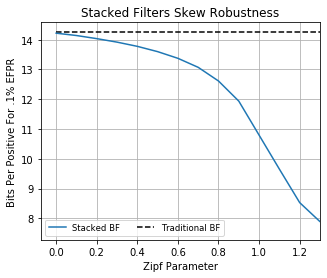

In [183]:
plt.figure(figsize=[5,4])
plt.hlines(14.25,0,1.5, label = "Traditional BF", ls="--")
plt.plot(zipf_sweep_001["Zipf Parameter"], zipf_sweep_001["Used Bits"], label="Stacked BF")
plt.ylabel("Bits Per Positive For .1% EFPR")
plt.xlabel("Zipf Parameter")
plt.xlim(xmax=1.3)
plt.title("Stacked Filters Skew Robustness")
plt.legend(ncol=2, loc="lower left",prop={'size': 8.5})
plt.grid()
plt.show()

In [208]:
workload_sweep_010 = pd.read_csv("../Data/workload_knowledge_sweep_010.csv")
workload_sweep_005 = pd.read_csv("../Data/workload_knowledge_sweep_005.csv")
workload_sweep_001 = pd.read_csv("../Data/workload_knowledge_sweep_001.csv")

In [ ]:
print(workload_sweep_001)

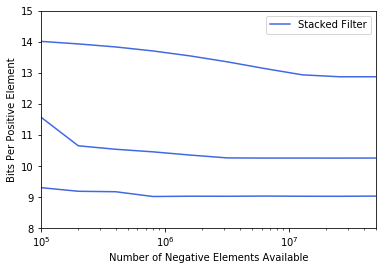

In [226]:
plt.plot(workload_sweep_010["Number of Known Negatives Available"], workload_sweep_010["Used Bits"], label="Stacked Filter", color="royalblue")
plt.plot(workload_sweep_005["Number of Known Negatives Available"], workload_sweep_005["Used Bits"], color="royalblue")
plt.plot(workload_sweep_001["Number of Known Negatives Available"], workload_sweep_001["Used Bits"], color="royalblue")
plt.xscale("log")
plt.axis(xmin=100000, xmax=50000000, ymin=8, ymax=15)
plt.ylabel("Bits Per Positive Element")
plt.xlabel("Number of Negative Elements Available")
plt.legend()
plt.show()

In [53]:
data_sizes_sweep_010 = pd.read_csv("../Data/data_sizes_sweep_010.csv")
data_sizes_sweep_005 = pd.read_csv("../Data/data_sizes_sweep_005.csv")
data_sizes_sweep_001 = pd.read_csv("../Data/data_sizes_sweep_001.csv")

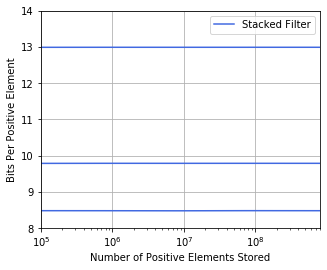

In [54]:
plt.figure(figsize=[5,4])
plt.plot(data_sizes_sweep_010["Number Of Positive Elements"], data_sizes_sweep_010["Used Bits"], label="Stacked Filter", color="royalblue")
plt.plot(data_sizes_sweep_005["Number Of Positive Elements"], data_sizes_sweep_005["Used Bits"], color="royalblue")
plt.plot(data_sizes_sweep_001["Number Of Positive Elements"], data_sizes_sweep_001["Used Bits"], color="royalblue")
plt.xscale("log")
plt.axis(xmin=100000, xmax=800000000, ymin=8, ymax=14)
plt.ylabel("Bits Per Positive Element")
plt.xlabel("Number of Positive Elements Stored")
plt.legend()
plt.grid()
plt.savefig('../Figures/data_sizes_Bloom.pdf', bbox_inches='tight')
plt.show()

In [319]:
construction_sweep = pd.read_csv("../Data/construction_negatives_sweep_010_REDO2.csv")

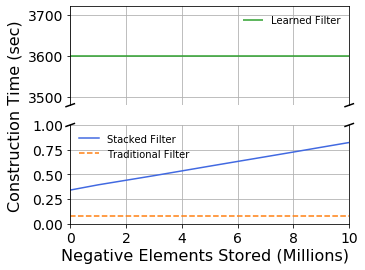

In [341]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=[5,4])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
f.text(0.5, 0., "Negative Elements Stored (Millions)", ha='center', fontsize=16)
f.text(-.05, 0.5,"Construction Time (sec)", va='center', rotation='vertical', fontsize=16)

# plot the same data on both axes
ax2.plot(construction_sweep["Number of Known Negatives Chosen"]/1000000, construction_sweep["Construction Time"]+.25, label="Stacked Filter", color="royalblue")
ax2.hlines(.08, 0, 51000000/1000000, ls="--", color="tab:orange", label="Traditional Filter")
ax.hlines(60*60,0, 51000000/1000000, color="tab:green", label="Learned Filter")

# zoom-in / limit the view to different portions of the data
ax.set_ylim(58*60, 62*60)  # outliers only
ax2.set_ylim(0, 1)  # most of the data

ax.set_xlim(xmin=0,xmax=10)

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) 
ax.tick_params(labeltop=False, labelsize=14)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal


ax.grid()
ax2.grid()
# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'
plt.legend(frameon=False)
ax.legend(frameon=False)

plt.savefig('../Figures/construction_sweep_Bloom.pdf', bbox_inches='tight')
plt.show()

In [707]:
psi_sweep = pd.read_csv("../Data/psi_sweep_graph_010.csv")

In [708]:
unknown_050 = (psi_sweep[psi_sweep["Zipf Parameter"]==.52]["Unknown FPR"])[0]
unknown_075 = (psi_sweep[psi_sweep["Zipf Parameter"]==.77]["Unknown FPR"])[1]
unknown_100 = (psi_sweep[psi_sweep["Zipf Parameter"]==1.02]["Unknown FPR"])[2]
unknown_125 = (psi_sweep[psi_sweep["Zipf Parameter"]==1.27]["Unknown FPR"])[3]
known_050 = (psi_sweep[psi_sweep["Zipf Parameter"]==.52]["Known FPR"])[0]
known_075 = (psi_sweep[psi_sweep["Zipf Parameter"]==.77]["Known FPR"])[1]
known_100 = (psi_sweep[psi_sweep["Zipf Parameter"]==1.02]["Known FPR"])[2]
known_125 = (psi_sweep[psi_sweep["Zipf Parameter"]==1.27]["Known FPR"])[3]
psi_050 = (psi_sweep[psi_sweep["Zipf Parameter"]==.52]["Psi"])[0]
psi_075 = (psi_sweep[psi_sweep["Zipf Parameter"]==.77]["Psi"])[1]
psi_100 = (psi_sweep[psi_sweep["Zipf Parameter"]==1.02]["Psi"])[2]
psi_125 = (psi_sweep[psi_sweep["Zipf Parameter"]==1.27]["Psi"])[3]
bits_050 = (psi_sweep[psi_sweep["Zipf Parameter"]==.52]["Used Bits"])[0]
bits_075 = (psi_sweep[psi_sweep["Zipf Parameter"]==.77]["Used Bits"])[1]
bits_100 = (psi_sweep[psi_sweep["Zipf Parameter"]==1.02]["Used Bits"])[2]
bits_125 = (psi_sweep[psi_sweep["Zipf Parameter"]==1.27]["Used Bits"])[3]

In [709]:
psi_frac = np.linspace(0,1, 10)
psi_sweep_050_mix = []
psi_sweep_075_mix = []
psi_sweep_100_mix = []
psi_sweep_125_mix = []
for i in range(len(psi_frac)):
    psi_sweep_050_mix.append(known_050*(1-psi_frac[i])*psi_050+unknown_050*(1-(1-psi_frac[i])*psi_050)/(math.exp(-bits_050*math.log(2)**2)))
    psi_sweep_075_mix.append(known_075*(1-psi_frac[i])*psi_075+unknown_075*(1-(1-psi_frac[i])*psi_075)/(math.exp(-bits_075*math.log(2)**2)))
    psi_sweep_100_mix.append(known_100*(1-psi_frac[i])*psi_100+unknown_100*(1-(1-psi_frac[i])*psi_100)/(math.exp(-bits_100*math.log(2)**2)))
    psi_sweep_125_mix.append(known_125*(1-psi_frac[i])*psi_100+unknown_125*(1-(1-psi_frac[i])*psi_125)/(math.exp(-bits_125*math.log(2)**2)))

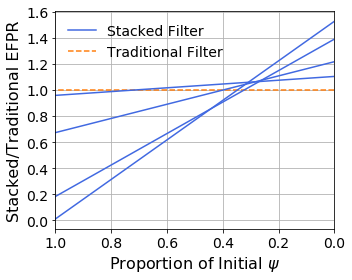

In [800]:
ax = plt.figure(figsize=[5,4])
plt.hlines(1, 0, 1, label = "Traditional Filter", ls="--", color="tab:orange")
plt.plot(1-psi_frac, psi_sweep_050_mix, label="Stacked Filter", color="royalblue")
plt.plot(1-psi_frac, psi_sweep_075_mix, color="royalblue")
plt.plot(1-psi_frac, psi_sweep_100_mix, color="royalblue")
plt.plot(1-psi_frac, psi_sweep_125_mix, color="royalblue")
plt.ylabel("Stacked/Traditional EFPR", fontsize=16)
plt.xlabel(r'Proportion of Initial $\psi$', fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.legend(prop={'size':14}, frameon=False)
plt.grid()
plt.xlim(1,0)
plt.savefig('../Figures/psi_sweep_Bloom.pdf', bbox_inches='tight')
plt.show()

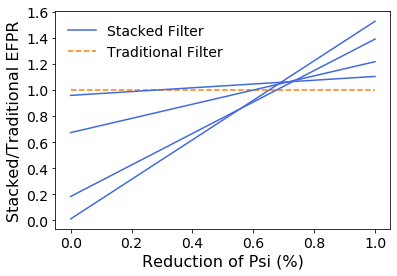

In [774]:
plt.hlines(1, 0, 1, label = "Traditional Filter", ls="--", color="tab:orange")
plt.plot(psi_frac, psi_sweep_050_mix, label="Stacked Filter", color="royalblue")
plt.plot(psi_frac, psi_sweep_075_mix, color="royalblue")
plt.plot(psi_frac, psi_sweep_100_mix, color="royalblue")
plt.plot(psi_frac, psi_sweep_125_mix, color="royalblue")
plt.ylabel("Stacked/Traditional EFPR", fontsize=16)
plt.xlabel("Reduction of Psi (%)", fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.legend(prop={'size':14})
plt.savefig('../Figures/data_sizes_Bloom.pdf', bbox_inches='tight')
plt.show()

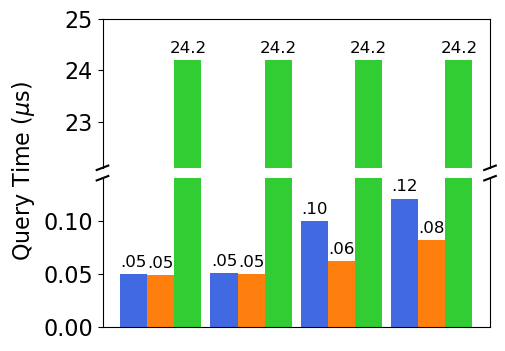

In [134]:
f, (ax2, ax) = plt.subplots(2, 1, sharex=True,figsize=[5,4])
bottom_axis_ymax = .14
top_axis_ymax = 25
top_axis_ymin = 22.1

# plot the same data on both axesstacked = pd.read_csv("../Data/url_blacklisting_stacked_performance.csv")stacked = pd.read_csv("../Data/firehose_comp_3.csv")
stacked = pd.read_csv("../Data/synthetic_comp_performance_STACKED.csv")
stacked_positive_lookup_per_sec =  (stacked["Positive Lookup Time"])
stacked_negative_lookup_per_sec =  (stacked["Negative Lookup Time"])
traditional = pd.read_csv("../Data/synthetic_comp_performance_TRADITIONAL.csv")
traditional_positive_lookup_per_sec =  (traditional["Positive Lookup Time"])
traditional_negative_lookup_per_sec =  (traditional["Negative Lookup Time"])


traditional_lookup_per_sec = [traditional_negative_lookup_per_sec[0], 
                              traditional_negative_lookup_per_sec[1],
                              traditional_positive_lookup_per_sec[0],
                              traditional_positive_lookup_per_sec[1]]
stacked_lookup_per_sec = [stacked_negative_lookup_per_sec[0],
                          stacked_negative_lookup_per_sec[1],
                          stacked_positive_lookup_per_sec[0],
                          stacked_positive_lookup_per_sec[1]]
rae_et_al_lookup_per_sec = [24.2,24.2,24.2,24.2]
cpu_filter_lookup_per_sec = [0.003,0.003,0.003,0.003]
x = np.arange(4)  # the label locations
width = 0.3 # the width of the bars

rects1 = ax.bar(x - width, stacked_lookup_per_sec, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x , traditional_lookup_per_sec, width, label='Traditional Bloom Filter', color="tab:orange")
rects3 = ax.bar(x + width, rae_et_al_lookup_per_sec, width, label='Learned BF Rae et al. 2019 (GPU)', color="limegreen")
rects1_2 = ax2.bar(x - width, stacked_lookup_per_sec, width, label='Stacked Bloom Filter', color="royalblue")
rects2_2 = ax2.bar(x , traditional_lookup_per_sec, width, label='Traditional Bloom Filter', color="tab:orange")
rects3_2 = ax2.bar(x + width, rae_et_al_lookup_per_sec, width, label='Learned BF Rae et al. 2019 (GPU)', color="limegreen")

# Add some text for labels, title and custom x-axis tick labels, etc.
f.text(-.06, 0.5,r'Query Time ($\mu$s)', va='center', rotation='vertical', fontsize=16)

#ax.set_yticks([.025,.05,.075,.1])
ax.set_ylim(ymax=bottom_axis_ymax)
ax2.set_ylim(ymin=top_axis_ymin, ymax=top_axis_ymax)
ax.tick_params(axis='y',labelsize=16,labeltop='off')
ax2.tick_params(axis='y',labelsize=16,labeltop='off')

ax.set_xticks([])
ax.set_xticklabels(bits, fontsize=16)
ax.tick_params(axis='x', top="off",labeltop='off')  # don't put tick labels at the top
ax.xaxis.tick_bottom()
ax2.xaxis.tick_top()

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height).lstrip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

def autolabel3(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.3f}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

autolabel1(rects1)
autolabel1(rects2)
autolabel0(rects3_2)



# hide the spines between ax and ax2
ax2.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax.transAxes)  # switch to the bottom axes
ax.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
f.subplots_adjust(hspace=0.07)
# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

fig.tight_layout()
plt.savefig('../Figures/Comp_Performance_Synthetic.pdf', bbox_inches='tight')
plt.show()

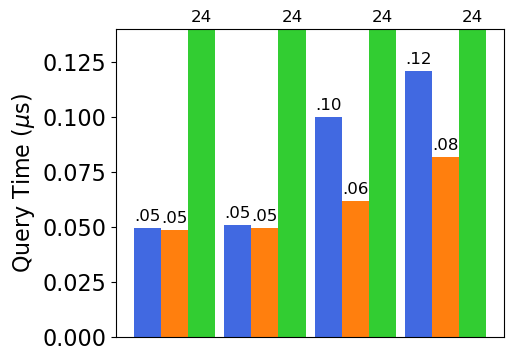

In [141]:
f, (ax) = plt.subplots(figsize=[5,4])
axis_ymax = .14

# plot the same data on both axesstacked = pd.read_csv("../Data/url_blacklisting_stacked_performance.csv")stacked = pd.read_csv("../Data/firehose_comp_3.csv")
stacked = pd.read_csv("../Data/synthetic_comp_performance_STACKED.csv")
stacked_positive_lookup_per_sec =  (stacked["Positive Lookup Time"])
stacked_negative_lookup_per_sec =  (stacked["Negative Lookup Time"])
traditional = pd.read_csv("../Data/synthetic_comp_performance_TRADITIONAL.csv")
traditional_positive_lookup_per_sec =  (traditional["Positive Lookup Time"])
traditional_negative_lookup_per_sec =  (traditional["Negative Lookup Time"])


traditional_lookup_per_sec = [traditional_negative_lookup_per_sec[0], 
                              traditional_negative_lookup_per_sec[1],
                              traditional_positive_lookup_per_sec[0],
                              traditional_positive_lookup_per_sec[1]]
stacked_lookup_per_sec = [stacked_negative_lookup_per_sec[0],
                          stacked_negative_lookup_per_sec[1],
                          stacked_positive_lookup_per_sec[0],
                          stacked_positive_lookup_per_sec[1]]
rae_et_al_lookup_per_sec = [24.2,24.2,24.2,24.2]
cpu_filter_lookup_per_sec = [0.003,0.003,0.003,0.003]
x = np.arange(4)  # the label locations
width = 0.3 # the width of the bars

rects1 = ax.bar(x - width, stacked_lookup_per_sec, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x , traditional_lookup_per_sec, width, label='Traditional Bloom Filter', color="tab:orange")
rects3 = ax.bar(x + width, rae_et_al_lookup_per_sec, width, label='Learned BF Rae et al. 2019 (GPU)', color="limegreen")
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel(r'Query Time ($\mu$s)', fontsize=16)

#ax.set_yticks([.025,.05,.075,.1])
ax.set_ylim(ymax=bottom_axis_ymax)
ax.tick_params(axis='y',labelsize=16,labeltop='off')

ax.set_xticks([])
ax.set_xticklabels(bits, fontsize=16)
ax.tick_params(axis='x', top="off",labeltop='off')  # don't put tick labels at the top
ax.xaxis.tick_bottom()

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value,axis_ymax)
        ax.annotate('{0:.2f}'.format(value).lstrip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value,axis_ymax)
        ax.annotate('{0:.0f}'.format(value).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

def autolabel3(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value,axis_ymax)
        ax.annotate('{0:.3f}'.format(value).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

autolabel1(rects1)
autolabel1(rects2)
autolabel2(rects3)



# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

fig.tight_layout()
plt.savefig('../Figures/Comp_Performance_Synthetic.pdf', bbox_inches='tight')
plt.show()

In [236]:
stacked

Number Of Positive Elements  Negative Sample Size  Zipf Parameter  \
0                      1000000               1000000            0.75   
1                      1000000               1000000            0.75   

   Negative Universe Size  Number of Known Negatives Available  \
0               100000000                          10000000000   
1               100000000                          10000000000   

   Number of Known Negatives Chosen       Psi  Bits Available  Equal Fprs  \
0                           2910616  0.407832              10           0   
1                          66450928  0.901989              14           0   

   Num Layers  Used Bits  Total FPR  Known FPR  Unknown FPR  \
0           3    9.95045   0.005963   0.000109     0.009975   
1           3   13.93030   0.000284   0.000023     0.002660   

   Construction Time  Positive Lookup Time  Negative Lookup Time  \
0           0.231428              0.099953              0.049724   
1           3.187560              0.120802              0.051002   

   Filter Checks For Positive  Filter Checks For Negative      EFPB  
0                           0                           0  0.010062  
1                           0                           0  0.002753

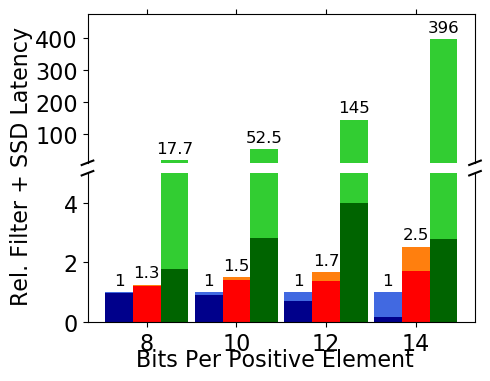

In [133]:
f, (ax2, ax) = plt.subplots(2, 1, sharex=True,figsize=[5,4])
bottom_axis_ymax = 5
top_axis_ymax = 475
top_axis_ymin = 10

# plot the same data on both axes
bits = ["8","10","12","14"]
stacked_comp_data = pd.read_csv("../Data/synthetic_disk_performance_STACKED_SSD.csv")
standard_comp_data = pd.read_csv("../Data/synthetic_disk_performance_TRADITIONAL_SSD.csv")
negative_lookups = 1000000
microseconds_to_seconds = 1000000
learned_false_positives = negative_lookups*np.array([0.0314,0.015791,0.007916,0.001989])
network_time_per_lookup = standard_comp_data["Disk Time"][0]/(standard_comp_data["Total FPR"][0]*1000000)

trad_comp_time_total = standard_comp_data["Lookup Time"]/negative_lookups*microseconds_to_seconds
trad_comp_time_disk = standard_comp_data["Disk Time"]/negative_lookups*microseconds_to_seconds

stacked_comp_time_total = stacked_comp_data["Lookup Time"]/negative_lookups*microseconds_to_seconds
stacked_comp_time_disk = stacked_comp_data["Disk Time"]/negative_lookups*microseconds_to_seconds

learned_comp_time_total = (negative_lookups)*(.0000242)+learned_false_positives*network_time_per_lookup
learned_comp_time_disk = learned_false_positives*network_time_per_lookup
learned_comp_time_total = learned_comp_time_total/negative_lookups*microseconds_to_seconds
learned_comp_time_disk = learned_comp_time_disk/negative_lookups*microseconds_to_seconds


# Normalize by stacked_comp_time_total
trad_comp_time_total = trad_comp_time_total/stacked_comp_time_total
trad_comp_time_disk = trad_comp_time_disk/stacked_comp_time_total
learned_comp_time_total = learned_comp_time_total/stacked_comp_time_total
learned_comp_time_disk = learned_comp_time_disk/stacked_comp_time_total
stacked_comp_time_disk = stacked_comp_time_disk/stacked_comp_time_total
stacked_comp_time_total = stacked_comp_time_total/stacked_comp_time_total

x = np.arange(len(bits))  # the label locations
width = 0.31  # the width of the bars

rects1 = ax.bar(x - width, stacked_comp_time_total, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x , trad_comp_time_total, width, label='Traditional Bloom Filter',color="tab:orange")
rects3 = ax.bar(x + width,[min(x,bottom_axis_ymax) for x in learned_comp_time_total], width, label='Learned Bloom Filter',color="limegreen")
rects4 = ax.bar(x - width, stacked_comp_time_disk, width, color="darkblue")
rects5 = ax.bar(x, trad_comp_time_disk, width ,color="red")
rects5 = ax.bar(x + width, [min(x,bottom_axis_ymax) for x in learned_comp_time_disk], width, color="darkgreen")
rects1_2 = ax2.bar(x - width, stacked_comp_time_total, width, label='Stacked Bloom Filter', color="royalblue")
rects2_2 = ax2.bar(x , trad_comp_time_total, width, label='Traditional Bloom Filter',color="tab:orange")
rects3_2 = ax2.bar(x + width, learned_comp_time_total, width, label='Learned Bloom Filter',color="limegreen")
rects4_2 = ax2.bar(x - width, stacked_comp_time_disk, width, color="darkblue")
rects5_2 = ax2.bar(x, trad_comp_time_disk, width ,color="red")
rects5_2 = ax2.bar(x + width, learned_comp_time_disk, width, color="darkgreen")

# Add some text for labels, title and custom x-axis tick labels, etc.
f.text(0.5, 0.,  'Bits Per Positive Element', ha='center', fontsize=16)
f.text(-.03, 0.5,r'Rel. Filter + SSD Latency', va='center', rotation='vertical', fontsize=16)


ax2.set_yticks([100,200,300,400])
#ax.set_yticks([3,6,9])
ax.set_ylim(ymax=bottom_axis_ymax)
ax2.set_ylim(ymin=top_axis_ymin, ymax=top_axis_ymax)
ax.tick_params(axis='y',labelsize=16,labeltop='off')
ax2.tick_params(axis='y',labelsize=16,labeltop='off')

ax.set_xticks(x)
ax.set_xticklabels(bits, fontsize=16)
ax.tick_params(axis='x', top="off",labeltop='off')  # don't put tick labels at the top
ax.xaxis.tick_bottom()
ax2.xaxis.tick_top()

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2g}'.format(height, style="plain").lstrip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    style="normal",
                    ha='center', va='bottom', fontsize=12)
def autolabel0(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax2.annotate('{0:.3g}'.format(height, style="plain"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    style="normal",
                    ha='center', va='bottom', fontsize=12)

autolabel1(rects1)
autolabel1(rects2)
autolabel0(rects3_2)



# hide the spines between ax and ax2
ax2.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax.transAxes)  # switch to the bottom axes
ax.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
f.subplots_adjust(hspace=0.07)
# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

fig.tight_layout()
plt.savefig('../Figures/Synthetic_Queries_SSD.pdf', bbox_inches='tight')
plt.show()

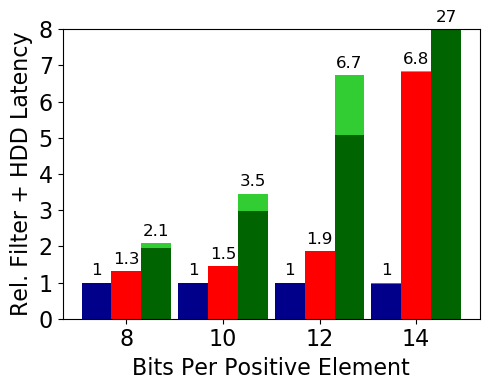

In [225]:
bits = ["8","10","12","14"]
stacked_comp_data = pd.read_csv("../Data/synthetic_disk_performance_STACKED_HDD.csv")
standard_comp_data = pd.read_csv("../Data/synthetic_disk_performance_TRADITIONAL_HDD.csv")
negative_lookups = standard_comp_data["Sample Size"]
learned_false_positives = negative_lookups*np.array([0.0314,0.015791,0.007916,0.001989])
network_time_per_lookup = standard_comp_data["Disk Time"][0]/(standard_comp_data["Total FPR"][0]*negative_lookups)


trad_comp_time_total = standard_comp_data["Lookup Time"]/negative_lookups
trad_comp_time_disk = standard_comp_data["Disk Time"]/negative_lookups

stacked_comp_time_total = stacked_comp_data["Lookup Time"]/negative_lookups
stacked_comp_time_disk = stacked_comp_data["Disk Time"]/negative_lookups

learned_comp_time_total = (negative_lookups)*(.0000242)+learned_false_positives*network_time_per_lookup
learned_comp_time_disk = learned_false_positives*network_time_per_lookup
learned_comp_time_total = learned_comp_time_total/negative_lookups
learned_comp_time_disk = learned_comp_time_disk/negative_lookups


# Normalize by stacked_comp_time_total
trad_comp_time_total = trad_comp_time_total/stacked_comp_time_total
trad_comp_time_disk = trad_comp_time_disk/stacked_comp_time_total
learned_comp_time_total = learned_comp_time_total/stacked_comp_time_total
learned_comp_time_disk = learned_comp_time_disk/stacked_comp_time_total
stacked_comp_time_disk = stacked_comp_time_disk/stacked_comp_time_total
stacked_comp_time_total = stacked_comp_time_total/stacked_comp_time_total

x = np.arange(len(bits))  # the label locations
width = 0.31  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width, stacked_comp_time_total, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x , trad_comp_time_total, width, label='Traditional Bloom Filter',color="tab:orange")
rects3 = ax.bar(x + width, learned_comp_time_total, width, label='Learned Bloom Filter',color="limegreen")
rects4 = ax.bar(x - width, stacked_comp_time_disk, width, color="darkblue")
rects5 = ax.bar(x, trad_comp_time_disk, width ,color="red")
rects5 = ax.bar(x + width, learned_comp_time_disk, width, color="darkgreen")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Rel. Filter + HDD Latency', fontsize=16)
ax.set_xlabel('Bits Per Positive Element', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(bits, fontsize=16)
plt.yticks(fontsize=16)
ax.set_ylim(ymax=8)

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, 8)
        ax.annotate('{0:.2g}'.format(value, style="plain").lstrip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    style="normal",
                    ha='center', va='bottom', fontsize=12)
def autolabel0(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height
        ()
        ax.annotate('{0:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)


autolabel1(rects1)
autolabel1(rects2)
autolabel1(rects3)

fig.tight_layout()
plt.savefig('../Figures/Synthetic_Queries_HDD.pdf', bbox_inches='tight')

plt.show()

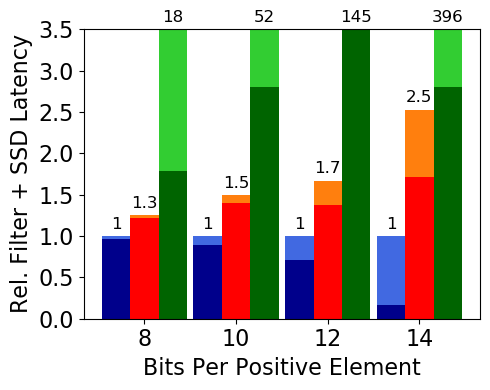

In [228]:
bits = ["8","10","12","14"]
stacked_comp_data = pd.read_csv("../Data/synthetic_disk_performance_STACKED_SSD.csv")
standard_comp_data = pd.read_csv("../Data/synthetic_disk_performance_TRADITIONAL_SSD.csv")
negative_lookups = standard_comp_data["Sample Size"]
learned_false_positives = negative_lookups*np.array([0.0314,0.015791,0.007916,0.001989])
network_time_per_lookup = standard_comp_data["Disk Time"][0]/(standard_comp_data["Total FPR"][0]*negative_lookups)

trad_comp_time_total = standard_comp_data["Lookup Time"]/negative_lookups
trad_comp_time_disk = standard_comp_data["Disk Time"]/negative_lookups

stacked_comp_time_total = stacked_comp_data["Lookup Time"]/negative_lookups
stacked_comp_time_disk = stacked_comp_data["Disk Time"]/negative_lookups

learned_comp_time_total = (negative_lookups)*(.0000242)+learned_false_positives*network_time_per_lookup
learned_comp_time_disk = learned_false_positives*network_time_per_lookup
learned_comp_time_total = learned_comp_time_total/negative_lookups
learned_comp_time_disk = learned_comp_time_disk/negative_lookups


# Normalize by stacked_comp_time_total
trad_comp_time_total = trad_comp_time_total/stacked_comp_time_total
trad_comp_time_disk = trad_comp_time_disk/stacked_comp_time_total
learned_comp_time_total = learned_comp_time_total/stacked_comp_time_total
learned_comp_time_disk = learned_comp_time_disk/stacked_comp_time_total
stacked_comp_time_disk = stacked_comp_time_disk/stacked_comp_time_total
stacked_comp_time_total = stacked_comp_time_total/stacked_comp_time_total

x = np.arange(len(bits))  # the label locations
width = 0.31  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width, stacked_comp_time_total, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x , trad_comp_time_total, width, label='Traditional Bloom Filter',color="tab:orange")
rects3 = ax.bar(x + width, learned_comp_time_total, width, label='Learned Bloom Filter',color="limegreen")
rects4 = ax.bar(x - width, stacked_comp_time_disk, width, color="darkblue")
rects5 = ax.bar(x, trad_comp_time_disk, width ,color="red")
rects5 = ax.bar(x + width, learned_comp_time_disk, width, color="darkgreen")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Rel. Filter + SSD Latency', fontsize=16)
ax.set_xlabel('Bits Per Positive Element', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(bits, fontsize=16)
plt.yticks(fontsize=16)
ax.set_ylim(ymax=3.5)

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, 3.5)
        ax.annotate('{0:.2g}'.format(value, style="plain").lstrip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    style="normal",
                    ha='center', va='bottom', fontsize=12)
def autolabel0(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, 3.5)
        ax.annotate('{0:.0f}'.format(value),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, 3.5)
        ax.annotate('{0:.0f}'.format(value),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)


autolabel1(rects1)
autolabel1(rects2)
autolabel2(rects3)

fig.tight_layout()
plt.savefig('../Figures/Synthetic_Queries_SSD.pdf', bbox_inches='tight')

plt.show()

In [25]:
misspecified_fpr = pd.read_csv("../Data/misspecified_workload.csv")

In [26]:
misspecified_fpr

FPR  Zipf
0   0.006626  0.15
1   0.006617  0.20
2   0.006622  0.25
3   0.006619  0.30
4   0.006292  0.35
5   0.006106  0.40
6   0.006103  0.45
7   0.005902  0.50
8   0.005841  0.55
9   0.005758  0.60
10  0.005736  0.65
11  0.005710  0.70
12  0.005703  0.75
13  0.005710  0.80
14  0.005724  0.85
15  0.005736  0.90
16  0.005767  0.95
17  0.005799  1.00
18  0.005835  1.05
19  0.005868  1.10
20  0.005954  1.15
21  0.005963  1.20
22  0.006070  1.25
23  0.006166  1.30
24  0.006142  1.35

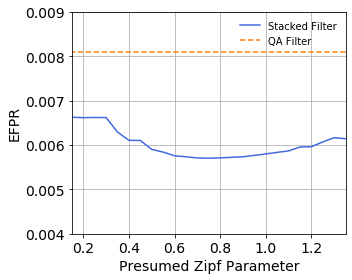

In [56]:
plt.figure(figsize=[5,4])

plt.plot(misspecified_fpr["Zipf"], misspecified_fpr["FPR"], color = "royalblue", label="Stacked Filter")
plt.hlines(.0081, xmin=0, xmax=3, color="tab:orange", linestyle="--", label="QA Filter")
plt.ylabel("EFPR", fontsize=14)
plt.xlabel("Presumed Zipf Parameter", fontsize=14)
plt.xlim(xmin=0.15, xmax=1.35)
plt.ylim(ymin=0.004,ymax=.009)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('../Figures/Misspecified_Workload.pdf', bbox_inches='tight')

-----------------------------URL BLACKLISTING----------------------------------------------------------------------------------------------------------------------------------------------------------

In [81]:
blacklisting_data = pd.read_csv("../Data/url_blacklisting.csv")
blacklisting_learned_bloom = pd.read_csv("../Data/url_learned_bloom_fpr_sweep.csv")
blacklisting_data_stacked = blacklisting_data
blacklisting_data_50 = blacklisting_data_stacked[blacklisting_data_stacked["Zipf Parameter"]==.5]
blacklisting_data_75 = blacklisting_data_stacked[blacklisting_data_stacked["Zipf Parameter"]==.75]
blacklisting_data_100 = blacklisting_data_stacked[blacklisting_data_stacked["Zipf Parameter"]== 1.02]
blacklisting_data_125 = blacklisting_data_stacked[blacklisting_data_stacked["Zipf Parameter"]== 1.25]

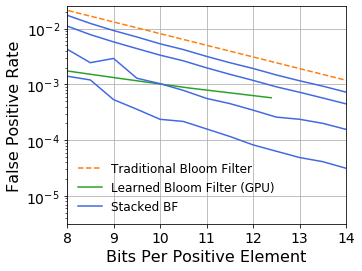

In [8]:
plt.figure(figsize=[5,4])
plt.plot(bloom_filter_size,bloom_filter_fpr,  label="Traditional Bloom Filter", linestyle="--", color="tab:orange")
plt.plot(blacklisting_learned_bloom["Bits Per Element"],blacklisting_learned_bloom["Total FPR"], label = "Learned Bloom Filter (GPU)", color="tab:green")
plt.plot(blacklisting_data_50["Bits Available"],blacklisting_data_50["Total FPR"], label = "Stacked BF", color="royalblue")
plt.plot(blacklisting_data_75["Bits Available"],blacklisting_data_75["Total FPR"], color="royalblue")
plt.plot(blacklisting_data_100["Bits Available"],blacklisting_data_100["Total FPR"],  color="royalblue")
plt.plot(blacklisting_data_125["Bits Available"],blacklisting_data_125["Total FPR"],  color="royalblue")
plt.yscale("log")
plt.ylabel("False Positive Rate", fontsize=16)
plt.xlabel("Bits Per Positive Element", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlim(xmin=8, xmax=14)
plt.ylim(ymax = .025, ymin=10**-5.5)
plt.legend(frameon=False, prop={'size': 12})
plt.grid()
plt.savefig('../Figures/FPR_vs_Bits_URL.pdf', bbox_inches='tight')
plt.show()

In [276]:
blacklisting_learned_bloom = pd.read_csv("../Data/url_learned_bloom_fpr_sweep_HALF_DATA_2.csv")
blacklisting_data_stacked = pd.read_csv("../Data/url_blacklisting_STACKED_HALF_DATA_2.csv")
blacklisting_data_traditional = pd.read_csv("../Data/url_blacklisting_TRADITIONAL.csv")

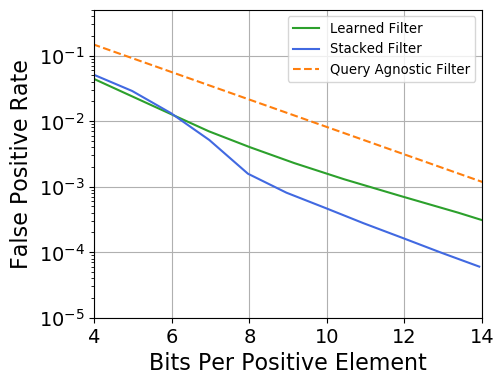

In [278]:
plt.figure(figsize=[5,4])
plt.plot(blacklisting_learned_bloom["Bits Per Element"],blacklisting_learned_bloom["Total FPR"], label = "Learned Filter", color="tab:green")
plt.plot(blacklisting_data_stacked["Used Bits"],blacklisting_data_stacked["Total FPR"], label = "Stacked Filter", color="royalblue")
# plt.plot(blacklisting_data_traditional["Used Bits"],blacklisting_data_traditional["Total FPR"], label = "Traditional Bloom Filter", linestyle="--", color="tab:orange")
plt.plot(bloom_filter_size,bloom_filter_fpr, label = "Query Agnostic Filter", linestyle="--", color="tab:orange")
plt.yscale("log")
plt.ylabel("False Positive Rate", fontsize=16)
plt.xlabel("Bits Per Positive Element", fontsize=16)
plt.xlim(xmin=4, xmax=14)
plt.ylim(ymax = .5, ymin=10**-5)
plt.legend( prop={'size': 9.5})
plt.grid()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('../Figures/FPR_vs_Bits_URL.pdf', bbox_inches='tight')
plt.show()

In [48]:
blacklisting_data = pd.read_csv("../Data/url_blacklisting_FULLNEGATIVES.csv")
blacklisting_learned_bloom = pd.read_csv("../Data/url_learned_bloom_fpr_sweep_FULLNEGATIVES.csv")
blacklisting_data_stacked = blacklisting_data[blacklisting_data["Num Layers"]==3]
blacklisting_data_50 = blacklisting_data_stacked[blacklisting_data_stacked["Zipf Parameter"]==.5]
blacklisting_data_75 = blacklisting_data_stacked[blacklisting_data_stacked["Zipf Parameter"]==.75]
blacklisting_data_100 = blacklisting_data_stacked[blacklisting_data_stacked["Zipf Parameter"]== 1.02]
blacklisting_data_125 = blacklisting_data_stacked[blacklisting_data_stacked["Zipf Parameter"]== 1.25]

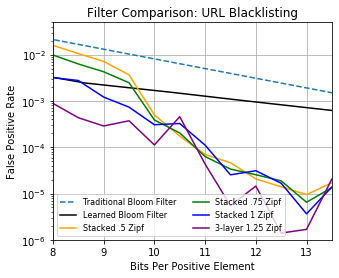

In [49]:
plt.figure(figsize=[5,4])
plt.plot(bloom_filter_size,bloom_filter_fpr,  label="Traditional Bloom Filter", linestyle="--")
plt.plot(blacklisting_learned_bloom["Bits Per Element"],blacklisting_learned_bloom["Total FPR"], label = "Learned Bloom Filter", color="black")
plt.plot(blacklisting_data_50["Bits Available"],blacklisting_data_50["Total FPR"], label = "Stacked .5 Zipf", color="orange")
plt.plot(blacklisting_data_75["Bits Available"],blacklisting_data_75["Total FPR"], label = "Stacked .75 Zipf", color="green")
plt.plot(blacklisting_data_100["Bits Available"],blacklisting_data_100["Total FPR"], label = "Stacked 1 Zipf", color="blue")
plt.plot(blacklisting_data_125["Bits Available"],blacklisting_data_125["Total FPR"], label = "3-layer 1.25 Zipf", color="purple")
plt.yscale("log")
plt.ylabel("False Positive Rate")
plt.xlabel("Bits Per Positive Element")
plt.xlim(xmin=8, xmax=13.5)
plt.ylim(ymax = .05, ymin=10**-6)
plt.title("Filter Comparison: URL Blacklisting")
plt.legend(ncol=2,prop={'size': 8})
plt.grid()
plt.show()

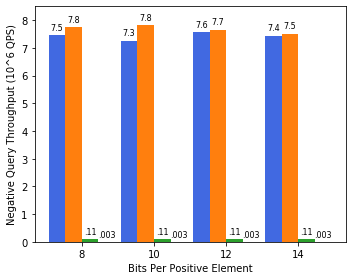

In [13]:
bits = ["8","10","12","14"]
stacked_negative_lookup_per_sec = pd.read_csv("../Data/url_blacklisting_stacked_performance.csv")
stacked_negative_lookup_per_sec =  1/(stacked_negative_lookup_per_sec["Negative Lookup Time"])
traditional_negative_lookup_per_sec = pd.read_csv("../Data/url_blacklisting_standard_performance.csv")
traditional_negative_lookup_per_sec =  1/(traditional_negative_lookup_per_sec["Negative Lookup Time"])

rae_et_al_lookup_per_sec = [0.107,0.107,0.107,0.107]
cpu_filter_lookup_per_sec = [0.003,0.003,0.003,0.003]
x = np.arange(len(bits))  # the label locations
width = 0.23  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width*3/2, stacked_negative_lookup_per_sec, width, label='Stacked Bloom Filter', color="royalblue")

rects2 = ax.bar(x -width/2, traditional_negative_lookup_per_sec, width, label='Traditional Bloom Filter', color="tab:orange")

rects3 = ax.bar(x + width/2, rae_et_al_lookup_per_sec, width, label='Learned BF Rae et al. 2019', color="tab:green")

rects4 = ax.bar(x + width*3/2, cpu_filter_lookup_per_sec, width, label='Learned BF Rae et al. 2019', color="darkgreen")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Negative Query Throughput (10^6 QPS)')
ax.set_xlabel('Bits Per Positive Element')
ax.set_xticks(x)
ax.set_xticklabels(bits)
ax.set_ylim(ymax=8.5)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.1f}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

def autolabel3(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.3f}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)


autolabel(rects1)
autolabel(rects2)
autolabel2(rects3)
autolabel3(rects4)

fig.tight_layout()

plt.savefig('../Figures/Negative_Queries_URL.pdf', bbox_inches='tight')
plt.show()


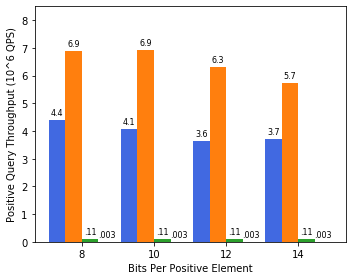

In [527]:
bits = ["8","10","12","14"]
stacked_positive_lookup_per_sec = pd.read_csv("../Data/url_blacklisting_stacked_performance.csv")
stacked_positive_lookup_per_sec =  1/(stacked_positive_lookup_per_sec["Positive Lookup Time"])*(14/100)
traditional_positive_lookup_per_sec = pd.read_csv("../Data/url_blacklisting_standard_performance.csv")
traditional_positive_lookup_per_sec =  1/(traditional_positive_lookup_per_sec["Positive Lookup Time"])*(14/100)

rae_et_al_lookup_per_sec = [0.107,0.107,0.107,0.107]
cpu_filter_lookup_per_sec = [0.003,0.003,0.003,0.003]
x = np.arange(len(bits))  # the label locations
width = 0.23  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width*3/2, stacked_positive_lookup_per_sec, width, label='Stacked Bloom Filter', color="royalblue")

rects2 = ax.bar(x -width/2, traditional_positive_lookup_per_sec, width, label='Traditional Bloom Filter', color="tab:orange")

rects3 = ax.bar(x + width/2, rae_et_al_lookup_per_sec, width, label='Learned BF Rae et al. 2019', color="tab:green")

rects4 = ax.bar(x + width*3/2, cpu_filter_lookup_per_sec, width, label='Learned BF Rae et al. 2019', color="darkgreen")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Positive Query Throughput (10^6 QPS)')
ax.set_xlabel('Bits Per Positive Element')
ax.set_xticks(x)
ax.set_xticklabels(bits)
ax.set_ylim(ymax=8.5)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.1f}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

def autolabel3(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.3f}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)


autolabel(rects1)
autolabel(rects2)
autolabel2(rects3)
autolabel3(rects4)


fig.tight_layout()

plt.savefig('../Figures/Positive_Queries_URL.pdf', bbox_inches='tight')
plt.show()


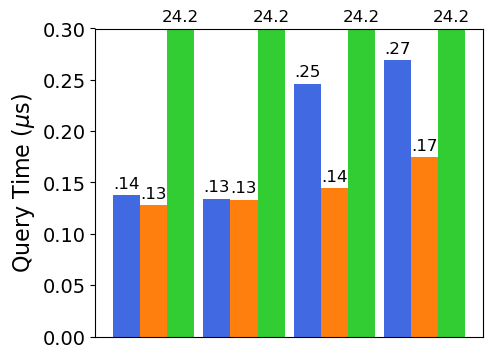

In [156]:
axis_ymax= .3
stacked = pd.read_csv("../Data/url_blacklisting_stacked_performance.csv")
stacked_positive_lookup_per_sec =  (stacked["Positive Lookup Time"])*(100/14)
stacked_negative_lookup_per_sec =  (stacked["Negative Lookup Time"])
traditional = pd.read_csv("../Data/url_blacklisting_standard_performance.csv")
traditional_positive_lookup_per_sec =  (traditional["Positive Lookup Time"])*(100/14)
traditional_negative_lookup_per_sec =  (traditional["Negative Lookup Time"])

traditional_lookup_per_sec = [traditional_negative_lookup_per_sec[1], 
                              traditional_negative_lookup_per_sec[3],
                              traditional_positive_lookup_per_sec[1],
                              traditional_positive_lookup_per_sec[3]]
stacked_lookup_per_sec = [stacked_negative_lookup_per_sec[1],
                          stacked_negative_lookup_per_sec[3],
                          stacked_positive_lookup_per_sec[1],
                          stacked_positive_lookup_per_sec[3]]
rae_et_al_lookup_per_sec = [24.2,24.2,24.2,24.2]
cpu_filter_lookup_per_sec = [0.003,0.003,0.003,0.003]
x = np.arange(4)  # the label locations
width = 0.3 # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width, stacked_lookup_per_sec, width, label='Stacked Bloom Filter', color="royalblue")

rects2 = ax.bar(x , traditional_lookup_per_sec, width, label='Traditional Bloom Filter', color="tab:orange")

rects3 = ax.bar(x + width, rae_et_al_lookup_per_sec, width, label='Learned BF Rae et al. 2019 (GPU)', color="limegreen")


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Query Time ($\mu$s)',fontsize=16)
ax.set_ylim(ymax=axis_ymax)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.2f}'.format(value).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.2f}'.format(value).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

def autolabel3(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.3f}'.format(value).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)


autolabel(rects1)
autolabel(rects2)
autolabel2(rects3)

plt.tick_params(
    axis='x',  
    which='both',
    bottom=False,
    top=False,        
    labelbottom=False)
plt.yticks(fontsize=14)

#fig.tight_layout()

plt.savefig('../Figures/Comp_Performance_URL.pdf', bbox_inches='tight')


/home/kylebd99/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


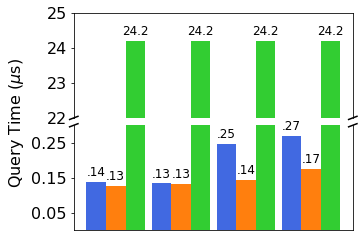

In [190]:
f, (ax2, ax) = plt.subplots(2, 1, sharex=True,figsize=[5,4])
bottom_axis_ymax = .3
top_axis_ymax = 25
top_axis_ymin = 22

# plot the same data on both axesstacked = pd.read_csv("../Data/url_blacklisting_stacked_performance.csv")
stacked_positive_lookup_per_sec =  (stacked["Positive Lookup Time"])*(100/14)
stacked_negative_lookup_per_sec =  (stacked["Negative Lookup Time"])
traditional = pd.read_csv("../Data/url_blacklisting_standard_performance.csv")
traditional_positive_lookup_per_sec =  (traditional["Positive Lookup Time"])*(100/14)
traditional_negative_lookup_per_sec =  (traditional["Negative Lookup Time"])

traditional_lookup_per_sec = [traditional_negative_lookup_per_sec[1], 
                              traditional_negative_lookup_per_sec[3],
                              traditional_positive_lookup_per_sec[1],
                              traditional_positive_lookup_per_sec[3]]
stacked_lookup_per_sec = [stacked_negative_lookup_per_sec[1],
                          stacked_negative_lookup_per_sec[3],
                          stacked_positive_lookup_per_sec[1],
                          stacked_positive_lookup_per_sec[3]]
rae_et_al_lookup_per_sec = [24.2,24.2,24.2,24.2]
cpu_filter_lookup_per_sec = [0.003,0.003,0.003,0.003]
x = np.arange(4)  # the label locations
width = 0.3 # the width of the bars

rects1 = ax.bar(x - width, stacked_lookup_per_sec, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x , traditional_lookup_per_sec, width, label='Traditional Bloom Filter', color="tab:orange")
rects3 = ax.bar(x + width, rae_et_al_lookup_per_sec, width, label='Learned BF Rae et al. 2019 (GPU)', color="limegreen")
rects1_2 = ax2.bar(x - width, stacked_lookup_per_sec, width, label='Stacked Bloom Filter', color="royalblue")
rects2_2 = ax2.bar(x , traditional_lookup_per_sec, width, label='Traditional Bloom Filter', color="tab:orange")
rects3_2 = ax2.bar(x + width, rae_et_al_lookup_per_sec, width, label='Learned BF Rae et al. 2019 (GPU)', color="limegreen")

# Add some text for labels, title and custom x-axis tick labels, etc.
f.text(-.06, 0.5,r'Query Time ($\mu$s)', va='center', rotation='vertical', fontsize=16)

ax.set_yticks([.05,.15,.25])
ax.set_ylim(ymax=bottom_axis_ymax)
ax2.set_ylim(ymin=top_axis_ymin, ymax=top_axis_ymax)
ax.tick_params(axis='y',labelsize=16,labeltop='off')
ax2.tick_params(axis='y',labelsize=16,labeltop='off')

ax.set_xticks([])
ax.set_xticklabels(bits, fontsize=16)
ax.tick_params(axis='x', top="off",labeltop='off')  # don't put tick labels at the top
ax.xaxis.tick_bottom()
ax2.xaxis.tick_top()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

def autolabel3(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.3f}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

autolabel1(rects1)
autolabel1(rects2)
autolabel0(rects3_2)



# hide the spines between ax and ax2
ax2.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax.transAxes)  # switch to the bottom axes
ax.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
f.subplots_adjust(hspace=0.07)
# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

fig.tight_layout()
plt.savefig('../Figures/Comp_Performance_URL.pdf', bbox_inches='tight')
plt.show()

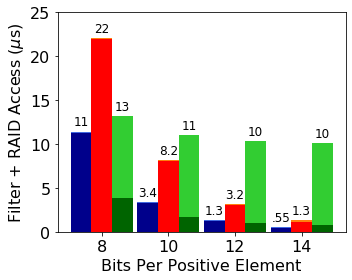

In [740]:
bits = ["8","10","12","14"]
bits = ["8","10","12","14"]
stacked_comp_data = pd.read_csv("../Data/stacked_url_perf.csv")
standard_comp_data = pd.read_csv("../Data/url_blacklisting_standard_performance.csv")
positive_fraction = 0
positive_lookups = 1000000*positive_fraction
negative_lookups = 1000000*(1-positive_fraction)
trad_false_positives = negative_lookups*standard_comp_data["Total FPR"]
stacked_false_positives = negative_lookups*stacked_comp_data["Total FPR"]
learned_false_positives = negative_lookups*np.array([0.004159, 0.001813, 0.000744, 0.000423])
network_time_per_lookup = 1/1000

trad_comp_time_total = (positive_lookups)*(standard_comp_data["Positive Lookup Time"]/1000000+network_time_per_lookup)
trad_comp_time_total += (negative_lookups)*(standard_comp_data["Negative Lookup Time"]/1000000)+trad_false_positives*network_time_per_lookup
trad_comp_time_disk = (positive_lookups)*(network_time_per_lookup)
trad_comp_time_disk += trad_false_positives*network_time_per_lookup

stacked_comp_time_total = (positive_lookups)*(stacked_comp_data["Positive Lookup Time"]/1000000+network_time_per_lookup)
stacked_comp_time_total += (negative_lookups)*(stacked_comp_data["Negative Lookup Time"]/1000000)+stacked_false_positives*network_time_per_lookup
stacked_comp_time_disk = (positive_lookups)*(network_time_per_lookup)
stacked_comp_time_disk += stacked_false_positives*network_time_per_lookup

learned_comp_time_total = (positive_lookups)*((1/107000)+network_time_per_lookup)
learned_comp_time_total += (negative_lookups)*((1/107000))+learned_false_positives*network_time_per_lookup
learned_comp_time_disk = (positive_lookups)*(network_time_per_lookup)
learned_comp_time_disk += learned_false_positives*network_time_per_lookup

x = np.arange(len(bits))  # the label locations
width = 0.31  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width, stacked_comp_time_total, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x , trad_comp_time_total, width, label='Traditional Bloom Filter',color="tab:orange")
rects3 = ax.bar(x + width, learned_comp_time_total, width, label='Learned Bloom Filter',color="limegreen")
rects4 = ax.bar(x - width, stacked_comp_time_disk, width, color="darkblue")
rects5 = ax.bar(x, trad_comp_time_disk, width ,color="red")
rects5 = ax.bar(x + width, learned_comp_time_disk, width, color="darkgreen")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Filter + RAID Access ($\mu$s)', fontsize=16)
ax.set_xlabel('Bits Per Positive Element', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(bits, fontsize=16)
plt.yticks(fontsize=16)
ax.set_ylim(ymax=25)

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2g}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
def autolabel0(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)


autolabel1(rects1)
autolabel1(rects2)
autolabel2(rects3)

fig.tight_layout()
plt.savefig('../Figures/Queries_RAID_HDD.pdf', bbox_inches='tight')

plt.show()


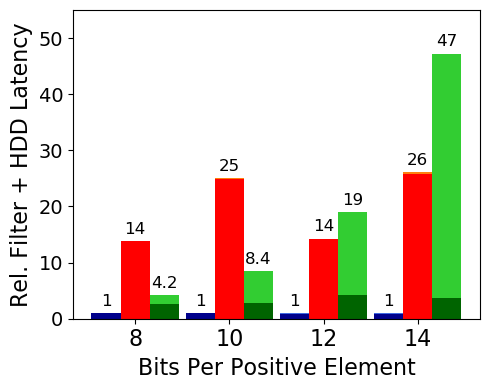

In [208]:
bits = ["8","10","12","14"]
stacked_comp_data = pd.read_csv("../Data/disk_performance_STACKED_HDD_v2.csv")
standard_comp_data = pd.read_csv("../Data/disk_performance_TRADITIONAL_HDD_v2.csv")
negative_lookups = standard_comp_data["Sample Size"]
learned_false_positives = negative_lookups*np.array([0.003994, 0.001295, 0.000715, 0.000211])
network_time_per_lookup = standard_comp_data["Disk Time"][0]/(standard_comp_data["Total FPR"][0]*negative_lookups)

trad_comp_time_total = standard_comp_data["Lookup Time"]/negative_lookups
trad_comp_time_disk = standard_comp_data["Disk Time"]/negative_lookups

stacked_comp_time_total = stacked_comp_data["Lookup Time"]/negative_lookups
stacked_comp_time_disk = stacked_comp_data["Disk Time"]/negative_lookups

learned_comp_time_total = (negative_lookups)*(.0000242)+learned_false_positives*network_time_per_lookup
learned_comp_time_disk = learned_false_positives*network_time_per_lookup
learned_comp_time_total = learned_comp_time_total/negative_lookups
learned_comp_time_disk = learned_comp_time_disk/negative_lookups


# Normalize by stacked_comp_time_total
trad_comp_time_total = trad_comp_time_total/stacked_comp_time_total
trad_comp_time_disk = trad_comp_time_disk/stacked_comp_time_total
learned_comp_time_total = learned_comp_time_total/stacked_comp_time_total
learned_comp_time_disk = learned_comp_time_disk/stacked_comp_time_total
stacked_comp_time_disk = stacked_comp_time_disk/stacked_comp_time_total
stacked_comp_time_total = stacked_comp_time_total/stacked_comp_time_total

x = np.arange(len(bits))  # the label locations
width = 0.31  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width, stacked_comp_time_total, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x , trad_comp_time_total, width, label='Traditional Bloom Filter',color="tab:orange")
rects3 = ax.bar(x + width, learned_comp_time_total, width, label='Learned Bloom Filter',color="limegreen")
rects4 = ax.bar(x - width, stacked_comp_time_disk, width, color="darkblue")
rects5 = ax.bar(x, trad_comp_time_disk, width ,color="red")
rects5 = ax.bar(x + width, learned_comp_time_disk, width, color="darkgreen")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Rel. Filter + HDD Latency', fontsize=16)
ax.set_xlabel('Bits Per Positive Element', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(bits, fontsize=16)
plt.yticks(fontsize=14)
ax.set_ylim(ymax=55)

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2g}'.format(height, style="plain").lstrip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    style="normal",
                    ha='center', va='bottom', fontsize=12)
def autolabel0(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height
        ()
        ax.annotate('{0:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)


autolabel1(rects1)
autolabel1(rects2)
autolabel1(rects3)

fig.tight_layout()
plt.savefig('../Figures/URL_Queries_HDD.pdf', bbox_inches='tight')

plt.show()

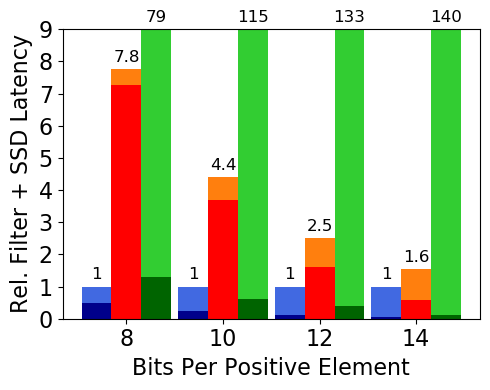

In [185]:
axis_ymax= 9
bits = ["8","10","12","14"]
stacked_comp_data = pd.read_csv("../Data/disk_performance_STACKED_SSD.csv")
standard_comp_data = pd.read_csv("../Data/disk_performance_TRADITIONAL_SSD.csv")
negative_lookups = standard_comp_data["Sample Size"]
learned_false_positives = negative_lookups*np.array([0.003994, 0.001295, 0.000715, 0.000211])
network_time_per_lookup = standard_comp_data["Disk Time"][0]/(standard_comp_data["Total FPR"][0]*negative_lookups)

trad_comp_time_total = standard_comp_data["Lookup Time"]/negative_lookups
trad_comp_time_disk = standard_comp_data["Disk Time"]/negative_lookups

stacked_comp_time_total = stacked_comp_data["Lookup Time"]/negative_lookups
stacked_comp_time_disk = stacked_comp_data["Disk Time"]/negative_lookups

learned_comp_time_total = (negative_lookups)*(.0000242)+learned_false_positives*network_time_per_lookup
learned_comp_time_disk = learned_false_positives*network_time_per_lookup
learned_comp_time_total = learned_comp_time_total/negative_lookups
learned_comp_time_disk = learned_comp_time_disk/negative_lookups


# Normalize by stacked_comp_time_total
trad_comp_time_total = trad_comp_time_total/stacked_comp_time_total
trad_comp_time_disk = trad_comp_time_disk/stacked_comp_time_total
learned_comp_time_total = learned_comp_time_total/stacked_comp_time_total
learned_comp_time_disk = learned_comp_time_disk/stacked_comp_time_total
stacked_comp_time_disk = stacked_comp_time_disk/stacked_comp_time_total
stacked_comp_time_total = stacked_comp_time_total/stacked_comp_time_total


x = np.arange(len(bits))  # the label locations
width = 0.31  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])

rects1 = ax.bar(x - width, stacked_comp_time_total, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x , trad_comp_time_total, width, label='Traditional Bloom Filter',color="tab:orange")
rects3 = ax.bar(x + width, learned_comp_time_total, width, label='Learned Bloom Filter',color="limegreen")
rects4 = ax.bar(x - width, stacked_comp_time_disk, width, color="darkblue")
rects5 = ax.bar(x, trad_comp_time_disk, width ,color="red")
rects5 = ax.bar(x + width, learned_comp_time_disk, width, color="darkgreen")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Rel. Filter + SSD Latency', fontsize=16)
ax.set_xlabel('Bits Per Positive Element', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(bits, fontsize=16)
plt.yticks(fontsize=16)
ax.set_ylim(ymin=0,ymax=axis_ymax)

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.2g}'.format(value).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
def autolabel0(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.0f}'.format(value),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.0f}'.format(value),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)


autolabel1(rects1)
autolabel1(rects2)
autolabel2(rects3)

fig.tight_layout()
plt.savefig('../Figures/URL_Queries_SSD.pdf', bbox_inches='tight')

plt.show()

/home/kylebd99/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


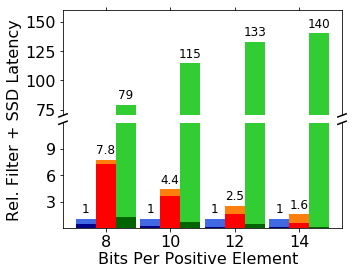

In [215]:
f, (ax2, ax) = plt.subplots(2, 1, sharex=True,figsize=[5,4])
bottom_axis_ymax = 12
top_axis_ymax = 160
top_axis_ymin = 70

# plot the same data on both axes
bits = ["8","10","12","14"]
stacked_comp_data = pd.read_csv("../Data/disk_performance_STACKED_SSD.csv")
standard_comp_data = pd.read_csv("../Data/disk_performance_TRADITIONAL_SSD.csv")
negative_lookups = 1000000
microseconds_to_seconds = 1000000
learned_false_positives = negative_lookups*np.array([0.003994, 0.001295, 0.000715, 0.000211])
network_time_per_lookup = standard_comp_data["Disk Time"][0]/(standard_comp_data["Total FPR"][0]*1000000)

trad_comp_time_total = standard_comp_data["Lookup Time"]/negative_lookups*microseconds_to_seconds
trad_comp_time_disk = standard_comp_data["Disk Time"]/negative_lookups*microseconds_to_seconds

stacked_comp_time_total = stacked_comp_data["Lookup Time"]/negative_lookups*microseconds_to_seconds
stacked_comp_time_disk = stacked_comp_data["Disk Time"]/negative_lookups*microseconds_to_seconds

learned_comp_time_total = (negative_lookups)*(.0000242)+learned_false_positives*network_time_per_lookup
learned_comp_time_disk = learned_false_positives*network_time_per_lookup
learned_comp_time_total = learned_comp_time_total/negative_lookups*microseconds_to_seconds
learned_comp_time_disk = learned_comp_time_disk/negative_lookups*microseconds_to_seconds


# Normalize by stacked_comp_time_total
trad_comp_time_total = trad_comp_time_total/stacked_comp_time_total
trad_comp_time_disk = trad_comp_time_disk/stacked_comp_time_total
learned_comp_time_total = learned_comp_time_total/stacked_comp_time_total
learned_comp_time_disk = learned_comp_time_disk/stacked_comp_time_total
stacked_comp_time_disk = stacked_comp_time_disk/stacked_comp_time_total
stacked_comp_time_total = stacked_comp_time_total/stacked_comp_time_total

x = np.arange(len(bits))  # the label locations
width = 0.31  # the width of the bars

rects1 = ax.bar(x - width, stacked_comp_time_total, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x , trad_comp_time_total, width, label='Traditional Bloom Filter',color="tab:orange")
rects3 = ax.bar(x + width,[min(x,bottom_axis_ymax) for x in learned_comp_time_total], width, label='Learned Bloom Filter',color="limegreen")
rects4 = ax.bar(x - width, stacked_comp_time_disk, width, color="darkblue")
rects5 = ax.bar(x, trad_comp_time_disk, width ,color="red")
rects5 = ax.bar(x + width, [min(x,bottom_axis_ymax) for x in learned_comp_time_disk], width, color="darkgreen")
rects1_2 = ax2.bar(x - width, stacked_comp_time_total, width, label='Stacked Bloom Filter', color="royalblue")
rects2_2 = ax2.bar(x , trad_comp_time_total, width, label='Traditional Bloom Filter',color="tab:orange")
rects3_2 = ax2.bar(x + width, learned_comp_time_total, width, label='Learned Bloom Filter',color="limegreen")
rects4_2 = ax2.bar(x - width, stacked_comp_time_disk, width, color="darkblue")
rects5_2 = ax2.bar(x, trad_comp_time_disk, width ,color="red")
rects5_2 = ax2.bar(x + width, learned_comp_time_disk, width, color="darkgreen")

# Add some text for labels, title and custom x-axis tick labels, etc.
f.text(0.5, 0.,  'Bits Per Positive Element', ha='center', fontsize=16)
f.text(-.03, 0.5,r'Rel. Filter + SSD Latency', va='center', rotation='vertical', fontsize=16)


ax2.set_yticks([75, 100, 125, 150])
ax.set_yticks([3,6,9])
ax.set_ylim(ymax=bottom_axis_ymax)
ax2.set_ylim(ymin=top_axis_ymin, ymax=top_axis_ymax)
ax.tick_params(axis='y',labelsize=16,labeltop='off')
ax2.tick_params(axis='y',labelsize=16,labeltop='off')

ax.set_xticks(x)
ax.set_xticklabels(bits, fontsize=16)
ax.tick_params(axis='x', top="off",labeltop='off')  # don't put tick labels at the top
ax.xaxis.tick_bottom()
ax2.xaxis.tick_top()

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2g}'.format(height, style="plain").lstrip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    style="normal",
                    ha='center', va='bottom', fontsize=12)
def autolabel0(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax2.annotate('{0:.3g}'.format(height, style="plain"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    style="normal",
                    ha='center', va='bottom', fontsize=12)

autolabel1(rects1)
autolabel1(rects2)
autolabel0(rects3_2)



# hide the spines between ax and ax2
ax2.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax.transAxes)  # switch to the bottom axes
ax.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
f.subplots_adjust(hspace=0.07)
# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

fig.tight_layout()
plt.savefig('../Figures/URL_Queries_SSD.pdf', bbox_inches='tight')
plt.show()

In [47]:
stacked_comp_data

Number Of Positive Elements  Sample Size  Positive Rate  \
0                      1713331      1000000              0   
1                      1713331      1000000              0   
2                      1713331      1000000              0   
3                      1713331      1000000              0   

   Negative Universe Size  Number of Known Negatives Available  \
0                10000000                              5000000   
1                10000000                              5000000   
2                10000000                              5000000   
3                10000000                              5000000   

   Number of Known Negatives Chosen       Psi  Bits Available  Equal Fprs  \
0                           4999423  0.952773               8           0   
1                           4999915  0.952837              10           0   
2                           4999945  0.952774              12           0   
3                           4999928  0.952746              14           0   

   Num Layers  Used Bits  Total FPR  Known FPR  Unknown FPR  \
0           5    7.95973   0.001538   0.000002     0.033568   
1           3    9.95051   0.000479   0.000005     0.010299   
2           3   11.94010   0.000164   0.000000     0.003569   
3           3   13.93000   0.000058   0.000000     0.001297   

   Construction Time  Lookup Time  Filter Time  Disk Time      EFPB  
0            1.18258     0.311567     0.161104   0.150463  0.034946  
1            1.21541     0.212047     0.162728   0.049319  0.010372  
2            1.28747     0.182623     0.163360   0.019263  0.003562  
3            1.33829     0.172656     0.163954   0.008702  0.001289

In [48]:
standard_comp_data

Number Of Positive Elements  Sample Size  Positive Rate  \
0                      1713331      1000000              0   
1                      1713331      1000000              0   
2                      1713331      1000000              0   
3                      1713331      1000000              0   

   Negative Universe Size  Number of Known Negatives Available  \
0                10000000                              5000000   
1                10000000                              5000000   
2                10000000                              5000000   
3                10000000                              5000000   

   Number of Known Negatives Chosen  Psi  Bits Available  Equal Fprs  \
0                                 0    0               8           0   
1                                 0    0              10           0   
2                                 0    0              12           0   
3                                 0    0              14           0   

   Num Layers  Used Bits  Total FPR  Known FPR  Unknown FPR  \
0           1    8.01491   0.022497        NaN     0.021417   
1           1   10.00030   0.007976        NaN     0.008209   
2           1   12.02240   0.002988        NaN     0.003124   
3           1   14.00380   0.001029        NaN     0.001203   

   Construction Time  Lookup Time  Filter Time  Disk Time      EFPB  
0           0.255878     2.418160     0.153215   2.264940  0.021416  
1           0.285942     0.934141     0.154221   0.779919  0.008193  
2           0.336388     0.459123     0.164781   0.294342  0.003134  
3           0.358641     0.268506     0.165520   0.102986  0.001199

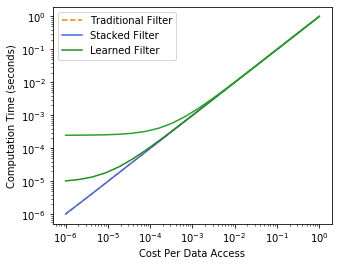

In [507]:
plt.figure(figsize=[5,4])
stacked_comp_data = pd.read_csv("../Data/stacked_url_perf.csv")
standard_comp_data = pd.read_csv("../Data/url_blacklisting_standard_performance.csv")
positive_fraction = 1
positive_lookups = 1000000*positive_fraction
negative_lookups = 1000000*(1-positive_fraction)
trad_false_positives = negative_lookups*standard_comp_data["Total FPR"]
stacked_false_positives = negative_lookups*stacked_comp_data["Total FPR"]
learned_false_positives = negative_lookups*np.array([0.004159, 0.001813, 0.000744, 0.000423])

bits_index = 1

trad_false_positive_rate = trad_false_positives[bits_index]
stacked_false_positive_rate = stacked_false_positives[bits_index]
learned_false_positive_rate = learned_false_positives[bits_index]
workload_cost = 1/np.geomspace(1,1000000, 20)
trad_comp_time = []
stacked_comp_time = []
learned_comp_time = []
learned_comp_cpu_time = []

for i in range(len(workload_cost)):
    trad_pos_comp_time = (positive_lookups)*(standard_comp_data["Positive Lookup Time"][bits_index]/1000000+workload_cost[i])
    trad_neg_comp_time = (negative_lookups)*(standard_comp_data["Negative Lookup Time"][bits_index]/1000000)+trad_false_positive_rate*workload_cost[i]
    trad_comp_time.append(trad_pos_comp_time+trad_neg_comp_time)
                          
    stacked_pos_comp_time = (positive_lookups)*(stacked_comp_data["Positive Lookup Time"][bits_index]/1000000+workload_cost[i])
    stacked_neg_comp_time = (negative_lookups)*(stacked_comp_data["Negative Lookup Time"][bits_index]/1000000)+stacked_false_positive_rate*workload_cost[i]
    stacked_comp_time.append(stacked_pos_comp_time+stacked_neg_comp_time)

    learned_neg_comp_time = (positive_lookups)*((1/107000)+workload_cost[i])
    learned_pos_comp_time = (negative_lookups)*((1/107000))+learned_false_positive_rate*workload_cost[i]
    learned_comp_time.append(learned_pos_comp_time+learned_neg_comp_time)

    learned_neg_cpu_comp_time = (positive_lookups)*((1/4000)+workload_cost[i])
    learned_pos_cpu_comp_time = (negative_lookups)*((1/4000))+learned_false_positive_rate*workload_cost[i]
    learned_comp_cpu_time.append(learned_pos_cpu_comp_time+learned_neg_cpu_comp_time)

plt.plot(workload_cost, np.array(trad_comp_time)/1000000, label="Traditional Filter", color="tab:orange", ls="--")
plt.plot(workload_cost, np.array(stacked_comp_time)/1000000, label="Stacked Filter", color="royalblue")
plt.plot(workload_cost, np.array(learned_comp_time)/1000000, label="Learned Filter", color="tab:green")
plt.plot(workload_cost, np.array(learned_comp_cpu_time)/1000000, color="tab:green")
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Computation Time (seconds)")
plt.xlabel("Cost Per Data Access")
plt.legend()
plt.show()

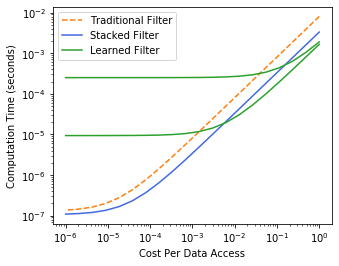

In [381]:
plt.figure(figsize=[5,4])
stacked_comp_data = pd.read_csv("../Data/stacked_url_perf.csv")
standard_comp_data = pd.read_csv("../Data/url_blacklisting_standard_performance.csv")
positive_fraction = 0
positive_lookups = 1000000*positive_fraction
negative_lookups = 1000000*(1-positive_fraction)
trad_false_positives = negative_lookups*standard_comp_data["Total FPR"]
stacked_false_positives = negative_lookups*stacked_comp_data["Total FPR"]
learned_false_positives = negative_lookups*np.array([0.003831,0.001646, 0.001012, 0.000735])

bits_index = 1

trad_false_positive_rate = trad_false_positives[bits_index]
stacked_false_positive_rate = stacked_false_positives[bits_index]
learned_false_positive_rate = learned_false_positives[bits_index]
workload_cost = 1/np.geomspace(1,1000000, 20)
trad_comp_time = []
stacked_comp_time = []
learned_comp_time = []
learned_comp_cpu_time = []

for i in range(len(workload_cost)):
    trad_pos_comp_time = (positive_lookups)*(standard_comp_data["Positive Lookup Time"][bits_index]/1000000+workload_cost[i])
    trad_neg_comp_time = (negative_lookups)*(standard_comp_data["Negative Lookup Time"][bits_index]/1000000)+trad_false_positive_rate*workload_cost[i]
    trad_comp_time.append(trad_pos_comp_time+trad_neg_comp_time)
                          
    stacked_pos_comp_time = (positive_lookups)*(stacked_comp_data["Positive Lookup Time"][bits_index]/1000000+workload_cost[i])
    stacked_neg_comp_time = (negative_lookups)*(stacked_comp_data["Negative Lookup Time"][bits_index]/1000000)+stacked_false_positive_rate*workload_cost[i]
    stacked_comp_time.append(stacked_pos_comp_time+stacked_neg_comp_time)

    learned_neg_comp_time = (positive_lookups)*((1/107000)+workload_cost[i])
    learned_pos_comp_time = (negative_lookups)*((1/107000))+learned_false_positive_rate*workload_cost[i]
    learned_comp_time.append(learned_pos_comp_time+learned_neg_comp_time)

    learned_neg_cpu_comp_time = (positive_lookups)*((1/4000)+workload_cost[i])
    learned_pos_cpu_comp_time = (negative_lookups)*((1/4000))+learned_false_positive_rate*workload_cost[i]
    learned_comp_cpu_time.append(learned_pos_cpu_comp_time+learned_neg_cpu_comp_time)

plt.plot(workload_cost, np.array(trad_comp_time)/1000000, label="Traditional Filter", color="tab:orange", ls="--")
plt.plot(workload_cost, np.array(stacked_comp_time)/1000000, label="Stacked Filter", color="royalblue")
plt.plot(workload_cost, np.array(learned_comp_time)/1000000, label="Learned Filter", color="tab:green")
plt.plot(workload_cost, np.array(learned_comp_cpu_time)/1000000, color="tab:green")
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Computation Time (seconds)")
plt.xlabel("Cost Per Data Access")
plt.legend()
plt.show()

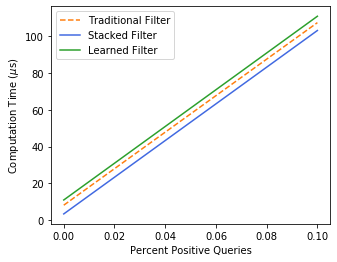

In [82]:
plt.figure(figsize=[5,4])
stacked_comp_data = pd.read_csv("../Data/stacked_url_perf.csv")
standard_comp_data = pd.read_csv("../Data/url_blacklisting_standard_performance.csv")
trad_comp_time = []
stacked_comp_time = []
learned_comp_time = []
positive_fraction = np.linspace(10**-6,.1,200)
workload_cost = 1/1000
bits_index = 1

for i in range(len(positive_fraction)):
    positive_lookups = 1000000*positive_fraction[i]
    negative_lookups = 1000000*(1-positive_fraction)[i]
    trad_false_positives = negative_lookups*standard_comp_data["Total FPR"]
    stacked_false_positives = negative_lookups*stacked_comp_data["Total FPR"]
    learned_false_positives = negative_lookups*np.array([0.003831,0.001646, 0.001012, 0.000735])
    trad_false_positive_rate = trad_false_positives[bits_index]
    stacked_false_positive_rate = stacked_false_positives[bits_index]
    learned_false_positive_rate = learned_false_positives[bits_index]
    
    trad_pos_comp_time = (positive_lookups)*(standard_comp_data["Positive Lookup Time"][bits_index]/1000000+workload_cost)
    trad_neg_comp_time = (negative_lookups)*(standard_comp_data["Negative Lookup Time"][bits_index]/1000000)+trad_false_positive_rate*workload_cost
    trad_comp_time.append(trad_pos_comp_time+trad_neg_comp_time)
                          
    stacked_pos_comp_time = (positive_lookups)*(stacked_comp_data["Positive Lookup Time"][bits_index]/1000000+workload_cost)
    stacked_neg_comp_time = (negative_lookups)*(stacked_comp_data["Negative Lookup Time"][bits_index]/1000000)+stacked_false_positive_rate*workload_cost
    stacked_comp_time.append(stacked_pos_comp_time+stacked_neg_comp_time)

    learned_neg_comp_time = (positive_lookups)*((1/107000)+workload_cost)
    learned_pos_comp_time = (negative_lookups)*((1/107000))+learned_false_positive_rate*workload_cost
    learned_comp_time.append(learned_pos_comp_time+learned_neg_comp_time)

plt.plot(positive_fraction, np.array(trad_comp_time), label="Traditional Filter", color="tab:orange", ls="--")
plt.plot(positive_fraction, np.array(stacked_comp_time), label="Stacked Filter", color="royalblue")
plt.plot(positive_fraction, np.array(learned_comp_time), label="Learned Filter", color="tab:green")
plt.ylabel(r'Computation Time ($\mu$s)')
plt.xlabel("Percent Positive Queries")
plt.legend()
plt.savefig('../Figures/Percent_Positives.pdf', bbox_inches='tight')
plt.show()

In [68]:
trad_false_positive_rate

0.0

In [352]:
stacked_false_positive_rate

11297.800000000001

In [353]:
learned_false_positive_rate

3831.0

In [277]:
standard_comp_data["Total FPR"]

0    0.021537
1    0.008169
2    0.003120
3    0.001254
Name: Total FPR, dtype: float64

In [278]:
stacked_comp_data["Total FPR"]

0    0.018494
1    0.005987
2    0.001837
3    0.000437
Name: Total FPR, dtype: float64

In [24]:
number_of_negs_stacked_01 = pd.read_csv("../Data/url_blacklisting_stacked_comparison_010.csv")
number_of_negs_learned_01 = pd.read_csv("../Data/url_learned_bloom_beta_sweep_09_29.csv")

In [25]:
### Adjusting the backup's false positive rate/size with respect to the particular false positive rate of the classifier for a given distribution.
number_of_negs_learned_01["Classifier FPR"] =number_of_negs_learned_01["Total FPR"] -.005
number_of_negs_learned_01["False Negatives"] = number_of_negs_learned_01["Size of Backup"]/(np.log(1/.005)/np.log(2)**2) 
number_of_negs_learned_01["Adjusted Backup Size"] = number_of_negs_learned_01["False Negatives"]*(-np.log(.01-number_of_negs_learned_01["Classifier FPR"])/np.log(2)**2) 
number_of_negs_learned_01["Adjusted Bits Per Element"] = (number_of_negs_learned_01["Adjusted Backup Size"]+2353*32)/140000

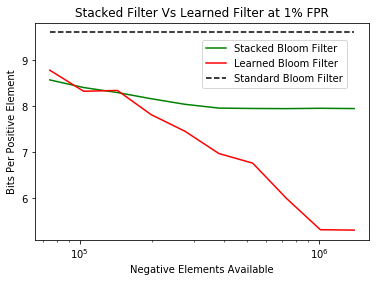

In [26]:
plt.hlines(9.6,min(number_of_negs_stacked_01["Number of Known Negatives Available"]),max(number_of_negs_stacked_01["Number of Known Negatives Available"]), label = "Traditional Bloom Filter", ls="--")
plt.plot(number_of_negs_stacked_01["Number of Known Negatives Available"],number_of_negs_stacked_01["Used Bits"], label = "Stacked Bloom Filter", color="green")
plt.plot(number_of_negs_learned_01["Number of Negatives"],number_of_negs_learned_01["Adjusted Bits Per Element"], label = "Learned Bloom Filter", color="red")
plt.ylabel("Bits Per Positive Element")
plt.xlabel("Negative Elements Available")
plt.xscale("log")
plt.title("Stacked Filter Vs Learned Filter at 1% FPR")
plt.legend(loc=(.5,.7))
plt.show()

In [27]:
number_of_negs_stacked_005 = pd.read_csv("../Data/url_blacklisting_stacked_comparison_005.csv")
number_of_negs_learned_005 = pd.read_csv("../Data/url_learned_bloom_beta_sweep_09_29_005.csv")

In [28]:
### Adjusting the backup's false positive rate/size with respect to the particular false positive rate of the classifier for a given distribution.
number_of_negs_learned_005["Classifier FPR"] =number_of_negs_learned_005["Total FPR"] -.0025
number_of_negs_learned_005["False Negatives"] = number_of_negs_learned_005["Size of Backup"]/(np.log(1/.0025)/np.log(2)**2) 
number_of_negs_learned_005["Adjusted Backup Size"] = number_of_negs_learned_005["False Negatives"]*(-np.log(.005-number_of_negs_learned_005["Classifier FPR"])/np.log(2)**2) 
number_of_negs_learned_005["Adjusted Bits Per Element"] = (number_of_negs_learned_005["Adjusted Backup Size"]+2353*32)/140000

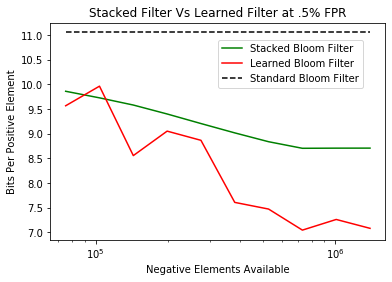

In [29]:
plt.hlines(11.05,min(number_of_negs_stacked_005["Number of Known Negatives Available"]),max(number_of_negs_stacked_005["Number of Known Negatives Available"]), label = "Traditional Bloom Filter", ls="--")
plt.plot(number_of_negs_stacked_005["Number of Known Negatives Available"],number_of_negs_stacked_005["Used Bits"], label = "Stacked Bloom Filter", color="green")
plt.plot(number_of_negs_learned_005["Number of Negatives"],number_of_negs_learned_005["Bits Per Element"], label = "Learned Bloom Filter", color="red")
plt.ylabel("Bits Per Positive Element")
plt.xlabel("Negative Elements Available")
plt.xscale("log")
plt.title("Stacked Filter Vs Learned Filter at .5% FPR")
plt.legend(loc=(.5,.7))
plt.show()

In [30]:
number_of_negs_stacked_001 = pd.read_csv("../Data/url_blacklisting_stacked_comparison_001.csv")
number_of_negs_learned_001 = pd.read_csv("../Data/url_learned_bloom_beta_sweep_09_29_001.csv")

In [31]:
### Adjusting the backup's false positive rate/size with respect to the particular false positive rate of the classifier for a given distribution.
number_of_negs_learned_001["Classifier FPR"] = number_of_negs_learned_001["Total FPR"] -.0005
number_of_negs_learned_001["False Negatives"] = number_of_negs_learned_001["Size of Backup"]/(np.log(1/.0005)/np.log(2)**2)
number_of_negs_learned_001["Adjusted Backup Size"] = number_of_negs_learned_001["False Negatives"]*(-np.log(.001-number_of_negs_learned_001["Classifier FPR"])/np.log(2)**2) 
number_of_negs_learned_001["Adjusted Bits Per Element"] = (number_of_negs_learned_001["Adjusted Backup Size"]+2353*32)/140000

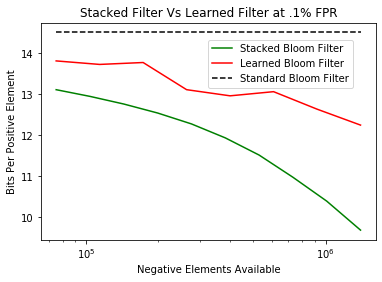

In [32]:
plt.hlines(14.5,min(number_of_negs_stacked_001["Number of Known Negatives Available"]),max(number_of_negs_stacked_001["Number of Known Negatives Available"]), label = "Traditional Bloom Filter", ls="--")
plt.plot(number_of_negs_stacked_001["Number of Known Negatives Available"],number_of_negs_stacked_001["Used Bits"], label = "Stacked Bloom Filter", color="green")
plt.plot(number_of_negs_learned_001["Number of Negatives"],number_of_negs_learned_001["Adjusted Bits Per Element"], label = "Learned Bloom Filter", color="red")
plt.ylabel("Bits Per Positive Element")
plt.xlabel("Negative Elements Available")
plt.xscale("log")
plt.title("Stacked Filter Vs Learned Filter at .1% FPR")
plt.legend(loc=(.5,.7))
plt.show()

In [33]:
zipf_stacked_01 = pd.read_csv("../Data/url_blacklisting_stacked_comparison_zipf_sweep_01.csv")
zipf_learned_01 = pd.read_csv("../Data/url_learned_bloom_zipf_sweep_01.csv")

In [34]:
### Adjusting the backup's false positive rate/size with respect to the particular false positive rate of the classifier for a given distribution.
zipf_learned_01["Classifier FPR"] = zipf_learned_01["Total FPR"] -.005
zipf_learned_01["False Negatives"] = zipf_learned_01["Size of Backup"]/(np.log(1/.005)/np.log(2)**2)
zipf_learned_01["Adjusted Backup Size"] = zipf_learned_01["False Negatives"]*(-np.log(.01-zipf_learned_01["Classifier FPR"])/np.log(2)**2) 
zipf_learned_01["Adjusted Bits Per Element"] = (zipf_learned_01["Adjusted Backup Size"]+2353*32)/140000

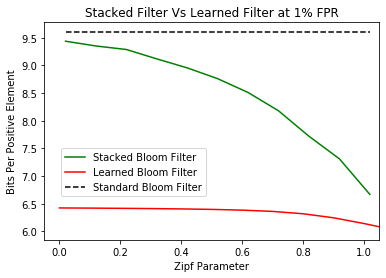

In [35]:
plt.hlines(9.6,min(zipf_stacked_01["Zipf Parameter"]),max(zipf_stacked_01["Zipf Parameter"]), label = "Traditional Bloom Filter", ls="--")
plt.plot(zipf_stacked_01["Zipf Parameter"],zipf_stacked_01["Used Bits"], label = "Stacked Bloom Filter", color="green")
plt.plot(zipf_learned_01["Zipf"],zipf_learned_01["Adjusted Bits Per Element"], label = "Learned Bloom Filter", color="red")
plt.ylabel("Bits Per Positive Element")
plt.xlabel("Zipf Parameter")
plt.xlim(xmax=1.05, xmin=-.05)
plt.title("Stacked Filter Vs Learned Filter at 1% FPR")
plt.legend(loc=(0.05,0.2))
plt.show()

In [36]:
zipf_stacked_005 = pd.read_csv("../Data/url_blacklisting_stacked_comparison_zipf_sweep_005.csv")
zipf_learned_005 = pd.read_csv("../Data/url_learned_bloom_zipf_sweep_005.csv")

In [37]:
### Adjusting the backup's false positive rate/size with respect to the particular false positive rate of the classifier for a given distribution.
zipf_learned_005["Classifier FPR"] = zipf_learned_005["Total FPR"] -.0025
zipf_learned_005["False Negatives"] = zipf_learned_005["Size of Backup"]/(np.log(1/.0025)/np.log(2)**2)
zipf_learned_005["Adjusted Backup Size"] = zipf_learned_005["False Negatives"]*(-np.log(.005-zipf_learned_005["Classifier FPR"])/np.log(2)**2) 
zipf_learned_005["Adjusted Bits Per Element"] = (zipf_learned_005["Adjusted Backup Size"]+2353*32)/140000

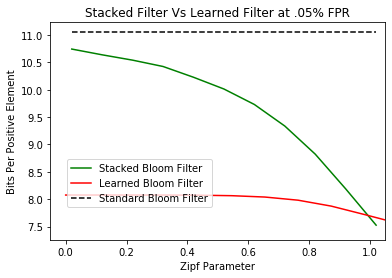

In [38]:
plt.hlines(11.05,min(zipf_stacked_005["Zipf Parameter"]),max(zipf_stacked_005["Zipf Parameter"]), label = "Traditional Bloom Filter", ls="--")
plt.plot(zipf_stacked_005["Zipf Parameter"],zipf_stacked_005["Used Bits"], label = "Stacked Bloom Filter", color="green")
plt.plot(zipf_learned_005["Zipf"],zipf_learned_005["Adjusted Bits Per Element"], label = "Learned Bloom Filter", color="red")
plt.ylabel("Bits Per Positive Element")
plt.xlabel("Zipf Parameter")
plt.xlim(xmax=1.05, xmin=-.05)
plt.title("Stacked Filter Vs Learned Filter at .05% FPR")
plt.legend(loc=(0.05,0.15))
plt.show()

In [39]:
zipf_stacked_001 = pd.read_csv("../Data/url_blacklisting_stacked_comparison_zipf_sweep_001.csv")
zipf_learned_001 = pd.read_csv("../Data/url_learned_bloom_zipf_sweep_001.csv")

In [40]:
### Adjusting the backup's false positive rate/size with respect to the particular false positive rate of the classifier for a given distribution.
zipf_learned_001["Classifier FPR"] = zipf_learned_001["Total FPR"] -.0025
zipf_learned_001["False Negatives"] = zipf_learned_001["Size of Backup"]/(np.log(1/.0025)/np.log(2)**2)
zipf_learned_001["Adjusted Backup Size"] = zipf_learned_001["False Negatives"]*(-np.log(.001-zipf_learned_001["Classifier FPR"])/np.log(2)**2) 
zipf_learned_001["Adjusted Bits Per Element"] = (zipf_learned_001["Adjusted Backup Size"]+2353*32)/140000

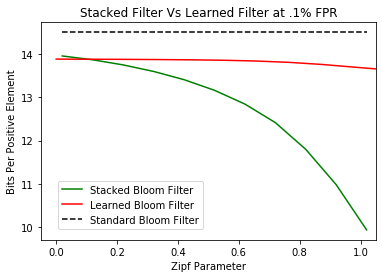

In [41]:
plt.hlines(14.5,min(zipf_stacked_001["Zipf Parameter"]),max(zipf_stacked_001["Zipf Parameter"]), label = "Traditional Bloom Filter", ls="--")
plt.plot(zipf_stacked_001["Zipf Parameter"],zipf_stacked_001["Used Bits"], label = "Stacked Bloom Filter", color="green")
plt.plot(zipf_learned_001["Zipf"],zipf_learned_001["Adjusted Bits Per Element"], label = "Learned Bloom Filter", color="red")
plt.ylabel("Bits Per Positive Element")
plt.xlabel("Zipf Parameter")
plt.xlim(xmax=1.05, xmin=-.05)
plt.title("Stacked Filter Vs Learned Filter at .1% FPR")
plt.legend(loc=(0.05,0.05))
plt.show()

In [701]:
swap_learned_01 = pd.read_csv("../Data/url_learned_bloom_learnability_sweep.csv")

In [702]:
### Adjusting the backup's false positive rate/size with respect to the particular false positive rate of the classifier for a given distribution.
swap_learned_01["Classifier FPR"] = swap_learned_01["Total FPR"] -.005
swap_learned_01["False Negatives"] = swap_learned_01["Size of Backup"]/(np.log(1/.005)/np.log(2)**2)
swap_learned_01["Adjusted Backup Size"] = swap_learned_01["False Negatives"]*(-np.log(.01-swap_learned_01["Classifier FPR"])/np.log(2)**2) 
swap_learned_01["Adjusted Bits Per Element"] = (swap_learned_01["Adjusted Backup Size"]+2353*32)/140000

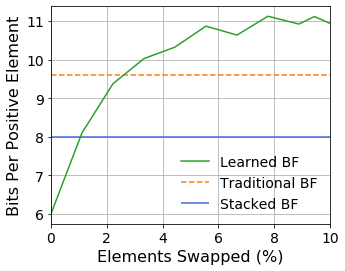

In [773]:
plt.figure(figsize=[5,4])
plt.hlines(9.6, xmin=0, xmax=10, label = "Traditional BF", ls="--", color="tab:orange")
plt.hlines(8, xmin=0, xmax=10, label = "Stacked BF", color="royalblue")
plt.plot(swap_learned_01["Percent Positives Swapped"]*100,swap_learned_01["Adjusted Bits Per Element"], label = "Learned BF", color="tab:green")
plt.ylabel("Bits Per Positive Element", fontsize=16)
plt.xlabel("Elements Swapped (%)", fontsize=16)
plt.xlim(xmax=10, xmin=0)
plt.legend(prop={'size':14}, frameon=False)
plt.grid()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('../Figures/learnability_URL.pdf', bbox_inches='tight')
plt.show()

In [173]:
swap_learned_001 = pd.read_csv("../Data/url_learned_bloom_learnability_sweep_001.csv")

In [176]:
### Adjusting the backup's false positive rate/size with respect to the particular false positive rate of the classifier for a given distribution.
swap_learned_001["Classifier FPR"] = swap_learned_001["Total FPR"] -.0005
swap_learned_001["False Negatives"] = swap_learned_001["Size of Backup"]/(np.log(1/.0005)/np.log(2)**2)
swap_learned_001["Adjusted Backup Size"] = swap_learned_001["False Negatives"]*(-np.log(.001-swap_learned_001["Classifier FPR"])/np.log(2)**2) 
swap_learned_001["Adjusted Bits Per Element"] = (swap_learned_001["Adjusted Backup Size"]+2353*32)/140000

/home/kylebd99/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


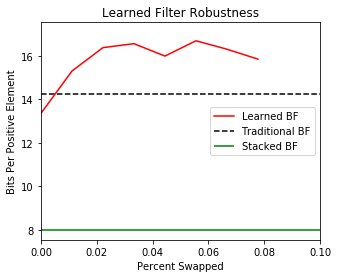

In [178]:
plt.figure(figsize=[5,4])
plt.hlines(14.25, xmin=0, xmax=.1, label = "Traditional BF", ls="--")
plt.hlines(8, xmin=0, xmax=.1, label = "Stacked BF", color="green")
plt.plot(swap_learned_001["Percent Positives Swapped"],swap_learned_001["Adjusted Bits Per Element"], label = "Learned BF", color="red")
plt.ylabel("Bits Per Positive Element")
plt.xlabel("Percent Swapped")
plt.xlim(xmax=0.1, xmin=0)
plt.title("Learned Filter Robustness")
plt.legend(loc="center right")
plt.show()

--------------------------------CQF INTEGER EXPERIMENTS------------------------------------------------------------------------------------------------------------------------------------------------

In [11]:
cqf_fpr = np.array([.025,.01,.001,.0001])
cqf_size = (np.log2(1/cqf_fpr)+2.125)/.95

In [12]:
three_filter_cqf = pd.read_csv("../Data/cqf_data_10_05_modulo.csv")
one_layer_cqf = pd.read_csv("../Data/cqf_data_standard.csv")

In [13]:
three_filter_cqf_00 = three_filter_cqf[three_filter_cqf["Zipf Parameter"]== 0]
three_filter_cqf_50 = three_filter_cqf[three_filter_cqf["Zipf Parameter"]==.5]
three_filter_cqf_75 = three_filter_cqf[three_filter_cqf["Zipf Parameter"]==.75]
three_filter_cqf_1 = three_filter_cqf[three_filter_cqf["Zipf Parameter"]==1.02]
three_filter_cqf_125 = three_filter_cqf[three_filter_cqf["Zipf Parameter"]==1.25]

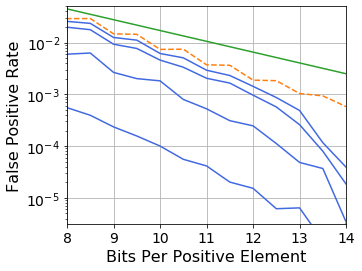

In [21]:
plt.figure(figsize=[5,4])
plt.plot(one_layer_cqf["Bits Available"], one_layer_cqf["Total FPR"], label="Traditional Quotient Filter", linestyle="--",color="tab:orange")
plt.plot(three_filter_cqf_50["Bits Available"],three_filter_cqf_50["Total FPR"], label = "Stacked Quotient Filter", color="royalblue")
plt.plot(three_filter_cqf_75["Bits Available"],three_filter_cqf_75["Total FPR"], color="royalblue")
plt.plot(three_filter_cqf_1["Bits Available"],three_filter_cqf_1["Total FPR"], color="royalblue")
plt.plot(three_filter_cqf_125["Bits Available"],three_filter_cqf_125["Total FPR"], color="royalblue")
plt.plot(learned_bloom_size,learned_bloom_fpr, label="Learned Bloom Filter",  color="tab:green")
plt.yscale("log")
plt.ylabel("False Positive Rate",fontsize=16)
plt.xlim(xmin=8, xmax=14)
plt.ylim(ymax = .05, ymin=10**-5.5)
#plt.legend(loc="lower left", prop={'size':11}, frameon=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.xlabel("Bits Per Positive Element",fontsize=16)
plt.savefig('../Figures/FPR_vs_Bits_CQF.pdf', bbox_inches='tight')
plt.show()

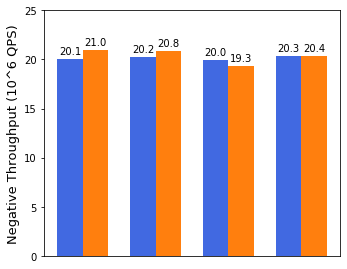

In [42]:
bits = ["8","10","12","14"]
stacked_negative_lookup_per_sec = pd.read_csv("../Data/cqf_performance_stacked_10_06.csv")
stacked_negative_lookup_per_sec =  1/(stacked_negative_lookup_per_sec["Negative Lookup Time"])
standard_negative_lookup_per_sec = pd.read_csv("../Data/cqf_performance_standard_10_06.csv")
standard_negative_lookup_per_sec =  1/(standard_negative_lookup_per_sec["Negative Lookup Time"])

x = np.arange(len(bits))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width/2, stacked_negative_lookup_per_sec, width, label='Stacked CQF', color="royalblue")
rects2 = ax.bar(x + width/2, standard_negative_lookup_per_sec, width, label='Traditional CQF',color="tab:orange")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Negative Throughput (10^6 QPS)', fontsize=13)
ax.set_ylim(ymax=25)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()


plt.tick_params(
    axis='x',  
    which='both',
    bottom=False,
    top=False,        
    labelbottom=False)
plt.savefig('../Figures/Negative_Queries_CQF.pdf', bbox_inches='tight')
plt.show()


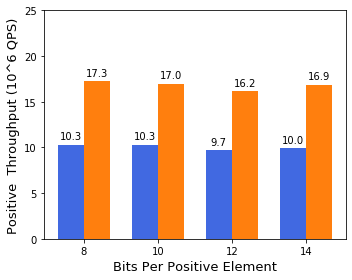

In [41]:
bits = ["8","10","12","14"]
stacked_positive_lookup_per_sec = pd.read_csv("../Data/cqf_performance_stacked_10_06.csv")
stacked_positive_lookup_per_sec =  1/(stacked_positive_lookup_per_sec["Positive Lookup Time"])
standard_positive_lookup_per_sec = pd.read_csv("../Data/cqf_performance_standard_10_06.csv")
standard_positive_lookup_per_sec =  1/(standard_positive_lookup_per_sec["Positive Lookup Time"])


x = np.arange(len(bits))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width/2, stacked_positive_lookup_per_sec, width, label='Stacked CQF', color="royalblue")
rects2 = ax.bar(x + width/2, standard_positive_lookup_per_sec, width, label='Traditional CQF',color="tab:orange")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Positive  Throughput (10^6 QPS)', fontsize=13)
ax.set_xlabel('Bits Per Positive Element', fontsize=13)
ax.set_xticks(x)
ax.set_ylim(ymax=25)
ax.set_xticklabels(bits)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig('../Figures/Positive_Queries_CQF.pdf', bbox_inches='tight')

plt.show()


In [ ]:
plt.figure(figsize=[15,12])
plt.plot(cqf_size, cqf_fpr, label="Traditional CQF", color="black", linestyle="-")
plt.plot(three_filter_cqf_50["Bits Available"],three_filter_cqf_50["Total FPR"], label = "Stacked CQF .5 Zipf", color="orange")
plt.plot(three_filter_cqf_75["Bits Available"],three_filter_cqf_75["Total FPR"], label = "Stacked CQF .75 Zipf", color="green")
plt.plot(three_filter_cqf_1["Bits Available"],three_filter_cqf_1["Total FPR"], label = "Stacked CQF 1 Zipf", color="blue")
plt.plot(three_filter_bloom_50["Bits Available"],three_filter_bloom_50["Total FPR"], label = "Stacked Bloom .5 Zipf", color="orange", linestyle="--")
plt.plot(three_filter_bloom_75["Bits Available"],three_filter_bloom_75["Total FPR"], label = "Stacked Bloom .75 Zipf", color="green", linestyle="--")
plt.plot(three_filter_bloom_1["Bits Available"],three_filter_bloom_1["Total FPR"], label = "Stacked Bloom 1 Zipf", color="blue", linestyle="--")
plt.yscale("log")
plt.ylabel("False Positive Rate")
plt.xlabel("Bits Per Positive Element")
plt.xlim(xmin=8, xmax=14)
plt.title("Filter Comparison: 32-Bit Integers")
plt.legend(ncol=2, prop={'size':12})
plt.grid()
plt.show()

----------------------------- CUCKOO FILTER INTEGER EXPERIMENTS ------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [23]:
cf_fpr = np.array([.025,.01,.001,.0001])
cf_size = (np.log2(1/cf_fpr)+3)/.95

In [24]:
three_filter_cf = pd.read_csv("../Data/cuckoo_data_fixed.csv")
one_layer_cf = pd.read_csv("../Data/cuckoo_data_fixed_standard.csv")

In [25]:
three_filter_cf_00 = three_filter_cf[three_filter_cf["Zipf Parameter"]== 0]
three_filter_cf_50 = three_filter_cf[three_filter_cf["Zipf Parameter"]==.5]
three_filter_cf_75 = three_filter_cf[three_filter_cf["Zipf Parameter"]==.75]
three_filter_cf_1 = three_filter_cf[three_filter_cf["Zipf Parameter"]==1.02]
three_filter_cf_125 = three_filter_cf[three_filter_cf["Zipf Parameter"]==1.25]

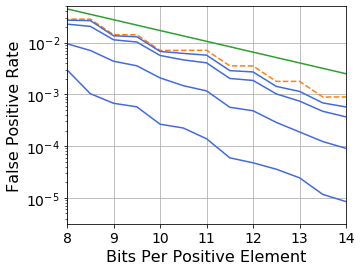

In [27]:
plt.figure(figsize=[5,4])
plt.plot(one_layer_cf["Bits Available"], one_layer_cf["Total FPR"], label="Traditional Cuckoo Filter", linestyle="--", color="tab:orange")
plt.plot(three_filter_cf_50["Bits Available"],three_filter_cf_50["Total FPR"], label = "Stacked Cuckoo Filter", color="royalblue")
plt.plot(three_filter_cf_75["Bits Available"],three_filter_cf_75["Total FPR"], color="royalblue")
plt.plot(three_filter_cf_1["Bits Available"],three_filter_cf_1["Total FPR"], color="royalblue")
plt.plot(three_filter_cf_125["Bits Available"],three_filter_cf_125["Total FPR"], color="royalblue")
plt.plot(learned_bloom_size,learned_bloom_fpr, label="Learned Bloom Filter",  color="tab:green")
plt.yscale("log")
plt.ylabel("False Positive Rate", fontsize=16)
plt.xlabel("Bits Per Positive Element", fontsize=16)
plt.xlim(xmin=8, xmax=14)
plt.ylim(ymax = .05, ymin=10**-5.5)
#plt.legend(loc="lower left", prop={'size':11}, frameon=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.savefig('../Figures/FPR_vs_Bits_CF.pdf', bbox_inches='tight')
plt.show()

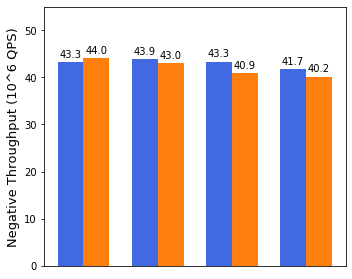

In [43]:
bits = ["8","10","12","14"]
stacked_negative_lookup_per_sec = pd.read_csv("../Data/cuckoo_performance_fixed_stacked.csv")
stacked_negative_lookup_per_sec =  1/(stacked_negative_lookup_per_sec["Negative Lookup Time"])*(950000/1000000)
standard_negative_lookup_per_sec = pd.read_csv("../Data/cuckoo_performance_fixed_standard.csv")
standard_negative_lookup_per_sec =  1/(standard_negative_lookup_per_sec["Negative Lookup Time"])*(950000/1000000)

learned_filter_lookup_per_sec = [0.107,0.107,0.107,0.107]
x = np.arange(len(bits))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width/2, stacked_negative_lookup_per_sec, width, label='Stacked CF', color="royalblue")

rects2 = ax.bar(x +width/2, standard_negative_lookup_per_sec, width, label='Traditional CF', color="tab:orange")


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Negative Throughput (10^6 QPS)', fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(bits)
ax.set_ylim(ymax=55)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')



plt.tick_params(
    axis='x',  
    which='both',
    bottom=False,
    top=False,        
    labelbottom=False)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('../Figures/Negative_Queries_CF.pdf', bbox_inches='tight')
plt.show()


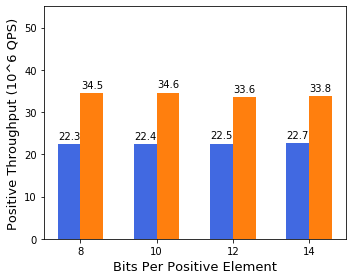

In [44]:
bits = ["8","10","12","14"]
stacked_positive_lookup_per_sec = pd.read_csv("../Data/cuckoo_performance_fixed_stacked.csv")
stacked_positive_lookup_per_sec =  1/(stacked_positive_lookup_per_sec["Positive Lookup Time"])*(950000/1000000)
standard_positive_lookup_per_sec = pd.read_csv("../Data/cuckoo_performance_fixed_standard.csv")
standard_positive_lookup_per_sec =  1/(standard_positive_lookup_per_sec["Positive Lookup Time"])*(950000/1000000)

learned_filter_lookup_per_sec = [0.107,0.107,0.107,0.107]
x = np.arange(len(bits))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width/2, stacked_positive_lookup_per_sec, width, label='Stacked CF', color="royalblue")

rects2 = ax.bar(x + width/2, standard_positive_lookup_per_sec, width, label='Traditional CF', color="tab:orange")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Positive Throughput (10^6 QPS)', fontsize=13)
ax.set_xlabel('Bits Per Positive Element', fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(bits)
ax.set_ylim(ymax=55)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig('../Figures/Positive_Queries_CF.pdf', bbox_inches='tight')

plt.show()


--------------------------------------- FireHose Experiments --------------------------------------------------------------------------------------------------------------------------------------------

In [313]:
one_layer_bloom = pd.read_csv("../Data/firehose_fpr_vs_bits_TRADITIONAL.csv")
three_layer_bloom = pd.read_csv("../Data/firehose_fpr_vs_bits_STACKED.csv")
learned_bloom = pd.read_csv("../Data/learned_bloom_firehose_data_2.csv")

In [314]:
bloom_filter_fpr = np.geomspace(.021, .001, 15)
bloom_filter_size = 1.44*np.log2(1/bloom_filter_fpr)
bloom_filter_fpr_linear = np.linspace(.03, .002, 15)
bloom_filter_size_linear = 1.44*np.log2(1/bloom_filter_fpr_linear)


In [315]:
learned_bloom

Total FPR  Size of Backup  Bits Per Element  Number of Negatives  Zipf
0   0.500000             NaN          3.000000                20000  0.75
1   0.250000         29275.0          4.500197                20000  0.75
2   0.125330         43857.0          5.937414                20000  0.75
3   0.062830         58439.0          7.374630                20000  0.75
4   0.031498         73020.0          8.811748                20000  0.75
5   0.015791         87602.0         10.248965                20000  0.75
6   0.007916        102184.0         11.686182                20000  0.75
7   0.003969        116766.0         13.123398                20000  0.75
8   0.001989        131348.0         14.560615                20000  0.75
9   0.000997        145930.0         15.997832                20000  0.75

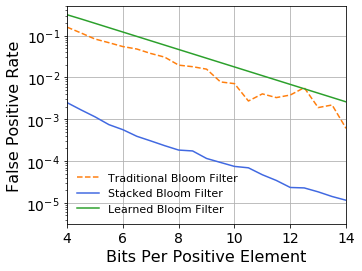

In [316]:
plt.figure(figsize=[5,4])
plt.plot(one_layer_bloom["Bits Available"], one_layer_bloom["Total FPR"], label="Traditional Bloom Filter", linestyle="--", color="tab:orange")
plt.plot(three_layer_bloom["Bits Available"],three_layer_bloom["Total FPR"], label = "Stacked Bloom Filter", color="royalblue")
plt.plot(learned_bloom["Bits Per Element"],learned_bloom["Total FPR"], label = "Learned Bloom Filter", color="tab:green")
plt.yscale("log")
plt.ylabel("False Positive Rate", fontsize=16)
plt.xlabel("Bits Per Positive Element", fontsize=16)
plt.xlim(xmin=4, xmax=14)
plt.ylim(ymax = .5, ymin=10**-5.5)
plt.legend(loc="lower left", prop={'size':11}, frameon=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.savefig('../Figures/FPR_vs_Bits_Firehose.pdf', bbox_inches='tight')
plt.show()

In [233]:
stacked_comp_data

Number Of Positive Elements  Sample Size  Positive Rate  \
0                        10000        25000              0   
1                        10000        25000              0   
2                        10000        25000              0   
3                        10000        25000              0   

   Negative Universe Size  Number of Known Negatives Available  \
0                   90000                                10000   
1                   90000                                10000   
2                   90000                                10000   
3                   90000                                10000   

   Number of Known Negatives Chosen       Psi  Bits Available  Equal Fprs  \
0                              9993  0.993987               8           0   
1                              9999  0.994091              10           0   
2                              9999  0.994024              12           0   
3                              9992  0.994162              14           0   

   Num Layers  Used Bits  Total FPR  Known FPR  Unknown FPR  \
0           3    7.98007   0.000160   0.000101     0.027798   
1           3    9.95410   0.000064   0.000100     0.010133   
2           3   11.94110   0.000028   0.000100     0.003918   
3           3   13.93560   0.000011   0.000100     0.001512   

   Construction Time  Lookup Time  Filter Time  Disk Time      EFPB  
0           0.002109     0.021832     0.001405   0.020427  0.028015  
1           0.001182     0.005292     0.000855   0.004437  0.010194  
2           0.001182     0.001931     0.000809   0.001122  0.003907  
3           0.001308     0.001459     0.000846   0.000613  0.001511

In [282]:
stacked_comp_data

Number Of Positive Elements  Sample Size  Positive Rate  \
0                        10000       100000              0   
1                        10000       100000              0   
2                        10000       100000              0   
3                        10000       100000              0   

   Negative Universe Size  Number of Known Negatives Available  \
0                   90000                                10000   
1                   90000                                10000   
2                   90000                                10000   
3                   90000                                10000   

   Number of Known Negatives Chosen       Psi  Bits Available  Equal Fprs  \
0                              9990  0.994018               8           0   
1                              9994  0.994100              10           0   
2                              9999  0.994043              12           0   
3                              9997  0.994069              14           0   

   Num Layers  Used Bits  Total FPR  Known FPR  Unknown FPR  \
0           3    7.97904   0.000164     0.0001     0.027742   
1           3    9.95460   0.000057     0.0001     0.010235   
2           3   11.94090   0.000022     0.0001     0.003853   
3           3   13.93640   0.000007     0.0001     0.001519   

   Construction Time  Lookup Time  Filter Time  Disk Time      EFPB  
0           0.002658     0.127870     0.005502   0.122368  0.027985  
1           0.001764     0.035257     0.004408   0.030850  0.010192  
2           0.001215     0.009409     0.003449   0.005960  0.003908  
3           0.001305     0.004541     0.003456   0.001085  0.001510

In [283]:
standard_comp_data

Number Of Positive Elements  Sample Size  Positive Rate  \
0                        10000       100000              0   
1                        10000       100000              0   
2                        10000       100000              0   
3                        10000       100000              0   

   Negative Universe Size  Number of Known Negatives Available  \
0                   90000                                10000   
1                   90000                                10000   
2                   90000                                10000   
3                   90000                                10000   

   Number of Known Negatives Chosen  Psi  Bits Available  Equal Fprs  \
0                                 0    0               8           0   
1                                 0    0              10           0   
2                                 0    0              12           0   
3                                 0    0              14           0   

   Num Layers  Used Bits  Total FPR  Known FPR  Unknown FPR  \
0           1     8.0149   0.017850        NaN     0.021539   
1           1    10.0003   0.005142        NaN     0.008180   
2           1    12.0224   0.001030        NaN     0.003151   
3           1    14.0038   0.000559        NaN     0.001226   

   Construction Time  Lookup Time  Filter Time  Disk Time      EFPB  
0           0.000884    16.041300     0.004657  16.036600  0.021416  
1           0.001039     4.566800     0.004820   4.561980  0.008193  
2           0.001489     0.902811     0.005242   0.897569  0.003134  
3           0.001460     0.477086     0.004934   0.472152  0.001199

In [236]:
standard_comp_data

Number Of Positive Elements  Sample Size  Positive Rate  \
0                        10000       100000              0   
1                        10000       100000              0   
2                        10000       100000              0   
3                        10000       100000              0   

   Negative Universe Size  Number of Known Negatives Available  \
0                   90000                                10000   
1                   90000                                10000   
2                   90000                                10000   
3                   90000                                10000   

   Number of Known Negatives Chosen  Psi  Bits Available  Equal Fprs  \
0                                 0    0               8           0   
1                                 0    0              10           0   
2                                 0    0              12           0   
3                                 0    0              14           0   

   Num Layers  Used Bits  Total FPR  Known FPR  Unknown FPR  \
0           1     8.0149   0.029294        NaN     0.021396   
1           1    10.0003   0.006718        NaN     0.008174   
2           1    12.0224   0.000912        NaN     0.003122   
3           1    14.0038   0.000222        NaN     0.001219   

   Construction Time  Lookup Time  Filter Time  Disk Time      EFPB  
0           0.000793    26.775800     0.003852  26.771900  0.021416  
1           0.001431     6.061580     0.004845   6.056740  0.008193  
2           0.001703     0.808366     0.005067   0.803299  0.003134  
3           0.001581     0.180153     0.004721   0.175432  0.001199

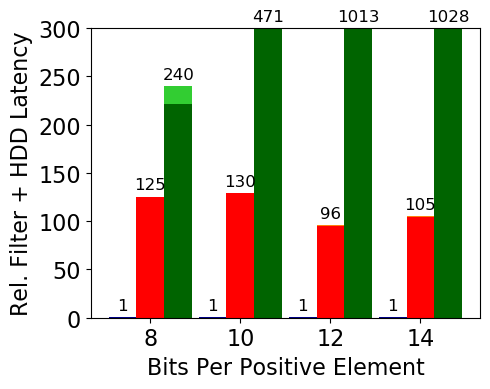

In [290]:
axis_ymax = 300
bits = ["8","10","12","14"]
stacked_comp_data = pd.read_csv("../Data/firehose_disk_performance_STACKED_HDD_v4.csv")
standard_comp_data = pd.read_csv("../Data/firehose_disk_performance_TRADITIONAL_HDD_v4.csv")
negative_lookups = standard_comp_data["Sample Size"][0]
learned_false_positives = negative_lookups*np.array([0.031498,0.015791,0.007916,0.0025])
network_time_per_lookup = standard_comp_data["Disk Time"][0]/(standard_comp_data["Total FPR"][0]*negative_lookups)

trad_comp_time_total = standard_comp_data["Lookup Time"]/negative_lookups
trad_comp_time_disk = standard_comp_data["Disk Time"]/negative_lookups

stacked_comp_time_total = stacked_comp_data["Lookup Time"]/negative_lookups
stacked_comp_time_disk = stacked_comp_data["Disk Time"]/negative_lookups
2.19e-5
learned_comp_time_total = (negative_lookups)*(.0000219)+learned_false_positives*network_time_per_lookup
learned_comp_time_disk = learned_false_positives*network_time_per_lookup
learned_comp_time_total = learned_comp_time_total/negative_lookups
learned_comp_time_disk = learned_comp_time_disk/negative_lookups


# Normalize by stacked_comp_time_total
trad_comp_time_total = trad_comp_time_total/stacked_comp_time_total
trad_comp_time_disk = trad_comp_time_disk/stacked_comp_time_total
learned_comp_time_total = learned_comp_time_total/stacked_comp_time_total
learned_comp_time_disk = learned_comp_time_disk/stacked_comp_time_total
stacked_comp_time_disk = stacked_comp_time_disk/stacked_comp_time_total
stacked_comp_time_total = stacked_comp_time_total/stacked_comp_time_total

x = np.arange(len(bits))  # the label locations
width = 0.31  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width, stacked_comp_time_total, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x , trad_comp_time_total, width, label='Traditional Bloom Filter',color="tab:orange")
rects3 = ax.bar(x + width, learned_comp_time_total, width, label='Learned Bloom Filter',color="limegreen")
rects4 = ax.bar(x - width, stacked_comp_time_disk, width, color="darkblue")
rects5 = ax.bar(x, trad_comp_time_disk, width ,color="red")
rects5 = ax.bar(x + width, learned_comp_time_disk, width, color="darkgreen")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Rel. Filter + HDD Latency', fontsize=16)
ax.set_xlabel('Bits Per Positive Element', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(bits, fontsize=16)
plt.yticks(fontsize=16)
ax.set_ylim(ymax=axis_ymax)

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.2g}'.format(value, style="plain").lstrip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    style="normal",
                    ha='center', va='bottom', fontsize=12)
def autolabel0(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.0f}'.format(value, style="plain").lstrip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    style="normal",
                    ha='center', va='bottom', fontsize=12)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.0f}'.format(value),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)


autolabel1(rects1)
autolabel0(rects2)
autolabel0(rects3)

fig.tight_layout()
plt.savefig('../Figures/Firehose_Queries_HDD.pdf', bbox_inches='tight')

plt.show()

In [291]:
stacked_comp_data

Number Of Positive Elements  Sample Size  Positive Rate  \
0                        10000       100000              0   
1                        10000       100000              0   
2                        10000       100000              0   
3                        10000       100000              0   

   Negative Universe Size  Number of Known Negatives Available  \
0                   90000                                10000   
1                   90000                                10000   
2                   90000                                10000   
3                   90000                                10000   

   Number of Known Negatives Chosen       Psi  Bits Available  Equal Fprs  \
0                              9990  0.994018               8           0   
1                              9994  0.994100              10           0   
2                              9999  0.994043              12           0   
3                              9997  0.994069              14           0   

   Num Layers  Used Bits  Total FPR  Known FPR  Unknown FPR  \
0           3    7.97904   0.000164     0.0001     0.027742   
1           3    9.95460   0.000057     0.0001     0.010235   
2           3   11.94090   0.000022     0.0001     0.003853   
3           3   13.93640   0.000007     0.0001     0.001519   

   Construction Time  Lookup Time  Filter Time  Disk Time      EFPB  
0           0.002658     0.127870     0.005502   0.122368  0.027985  
1           0.001764     0.035257     0.004408   0.030850  0.010192  
2           0.001215     0.009409     0.003449   0.005960  0.003908  
3           0.001305     0.004541     0.003456   0.001085  0.001510

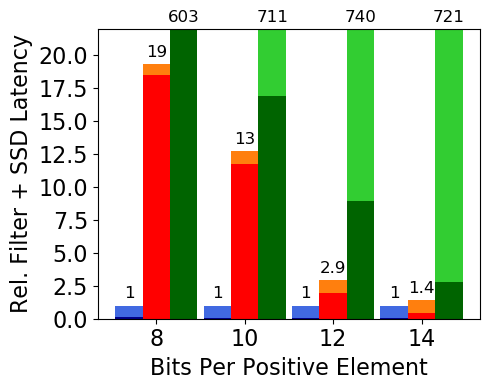

In [223]:
axis_ymax = 22
bits = ["8","10","12","14"]
stacked_comp_data = pd.read_csv("../Data/firehose_disk_performance_STACKED_SSD_v2.csv")
standard_comp_data = pd.read_csv("../Data/firehose_disk_performance_TRADITIONAL_SSD_v2.csv")
negative_lookups = standard_comp_data["Sample Size"][0]
learned_false_positives = negative_lookups*np.array([0.031498,0.015791,0.007916,0.0025])
network_time_per_lookup = standard_comp_data["Disk Time"][0]/(standard_comp_data["Total FPR"][0]*negative_lookups)



trad_comp_time_total = standard_comp_data["Lookup Time"]/negative_lookups
trad_comp_time_disk = standard_comp_data["Disk Time"]/negative_lookups

stacked_comp_time_total = stacked_comp_data["Lookup Time"]/negative_lookups
stacked_comp_time_disk = stacked_comp_data["Disk Time"]/negative_lookups

learned_comp_time_total = (negative_lookups)*(.0000242)+learned_false_positives*network_time_per_lookup
learned_comp_time_disk = learned_false_positives*network_time_per_lookup
learned_comp_time_total = learned_comp_time_total/negative_lookups
learned_comp_time_disk = learned_comp_time_disk/negative_lookups


# Normalize by stacked_comp_time_total
trad_comp_time_total = trad_comp_time_total/stacked_comp_time_total
trad_comp_time_disk = trad_comp_time_disk/stacked_comp_time_total
learned_comp_time_total = learned_comp_time_total/stacked_comp_time_total
learned_comp_time_disk = learned_comp_time_disk/stacked_comp_time_total
stacked_comp_time_disk = stacked_comp_time_disk/stacked_comp_time_total
stacked_comp_time_total = stacked_comp_time_total/stacked_comp_time_total

x = np.arange(len(bits))  # the label locations
width = 0.31  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width, stacked_comp_time_total, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x , trad_comp_time_total, width, label='Traditional Bloom Filter',color="tab:orange")
rects3 = ax.bar(x + width, learned_comp_time_total, width, label='Learned Bloom Filter',color="limegreen")
rects4 = ax.bar(x - width, stacked_comp_time_disk, width, color="darkblue")
rects5 = ax.bar(x, trad_comp_time_disk, width ,color="red")
rects5 = ax.bar(x + width, learned_comp_time_disk, width, color="darkgreen")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Rel. Filter + SSD Latency', fontsize=16)
ax.set_xlabel('Bits Per Positive Element', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(bits, fontsize=16)
plt.yticks(fontsize=16)
ax.set_ylim(ymax=axis_ymax)

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.2g}'.format(value, style="plain").lstrip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    style="normal",
                    ha='center', va='bottom', fontsize=12)
def autolabel0(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.0f}'.format(value, style="plain").lstrip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    style="normal",
                    ha='center', va='bottom', fontsize=12)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.0f}'.format(value),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)


autolabel1(rects1)
autolabel1(rects2)
autolabel0(rects3)

fig.tight_layout()
plt.savefig('../Figures/Firehose_Queries_SSD.pdf', bbox_inches='tight')

plt.show()

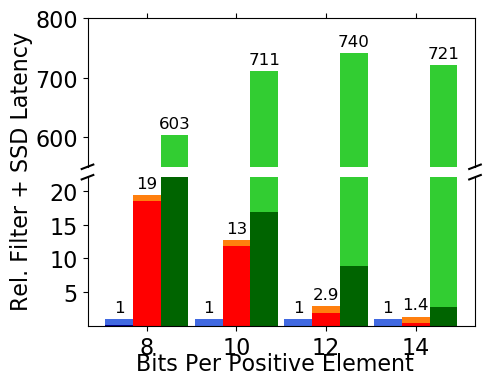

In [177]:
f, (ax2, ax) = plt.subplots(2, 1, sharex=True,figsize=[5,4])
bottom_axis_ymax = 22
top_axis_ymax = 800
top_axis_ymin = 550

# plot the same data on both axes
bits = ["8","10","12","14"]
stacked_comp_data = pd.read_csv("../Data/firehose_disk_performance_STACKED_SSD_v2.csv")
standard_comp_data = pd.read_csv("../Data/firehose_disk_performance_TRADITIONAL_SSD_v2.csv")
negative_lookups = standard_comp_data["Sample Size"][0]
learned_false_positives = negative_lookups*np.array([0.031498,0.015791,0.007916,0.0025])
network_time_per_lookup = standard_comp_data["Disk Time"][0]/(standard_comp_data["Total FPR"][0]*negative_lookups)

trad_comp_time_total = standard_comp_data["Lookup Time"]/negative_lookups
trad_comp_time_disk = standard_comp_data["Disk Time"]/negative_lookups

stacked_comp_time_total = stacked_comp_data["Lookup Time"]/negative_lookups
stacked_comp_time_disk = stacked_comp_data["Disk Time"]/negative_lookups

learned_comp_time_total = (negative_lookups)*(.0000242)+learned_false_positives*network_time_per_lookup
learned_comp_time_disk = learned_false_positives*network_time_per_lookup
learned_comp_time_total = learned_comp_time_total/negative_lookups
learned_comp_time_disk = learned_comp_time_disk/negative_lookups


# Normalize by stacked_comp_time_total
trad_comp_time_total = trad_comp_time_total/stacked_comp_time_total
trad_comp_time_disk = trad_comp_time_disk/stacked_comp_time_total
learned_comp_time_total = learned_comp_time_total/stacked_comp_time_total
learned_comp_time_disk = learned_comp_time_disk/stacked_comp_time_total
stacked_comp_time_disk = stacked_comp_time_disk/stacked_comp_time_total
stacked_comp_time_total = stacked_comp_time_total/stacked_comp_time_total

x = np.arange(len(bits))  # the label locations
width = 0.31  # the width of the bars

rects1 = ax.bar(x - width, stacked_comp_time_total, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x , trad_comp_time_total, width, label='Traditional Bloom Filter',color="tab:orange")
rects3 = ax.bar(x + width,[min(x,bottom_axis_ymax) for x in learned_comp_time_total], width, label='Learned Bloom Filter',color="limegreen")
rects4 = ax.bar(x - width, stacked_comp_time_disk, width, color="darkblue")
rects5 = ax.bar(x, trad_comp_time_disk, width ,color="red")
rects5 = ax.bar(x + width, [min(x,bottom_axis_ymax) for x in learned_comp_time_disk], width, color="darkgreen")
rects1_2 = ax2.bar(x - width, stacked_comp_time_total, width, label='Stacked Bloom Filter', color="royalblue")
rects2_2 = ax2.bar(x , trad_comp_time_total, width, label='Traditional Bloom Filter',color="tab:orange")
rects3_2 = ax2.bar(x + width, learned_comp_time_total, width, label='Learned Bloom Filter',color="limegreen")
rects4_2 = ax2.bar(x - width, stacked_comp_time_disk, width, color="darkblue")
rects5_2 = ax2.bar(x, trad_comp_time_disk, width ,color="red")
rects5_2 = ax2.bar(x + width, learned_comp_time_disk, width, color="darkgreen")

# Add some text for labels, title and custom x-axis tick labels, etc.
f.text(0.5, 0.,  'Bits Per Positive Element', ha='center', fontsize=16)
f.text(-.03, 0.5,r'Rel. Filter + SSD Latency', va='center', rotation='vertical', fontsize=16)


ax.set_yticks([5,10,15,20])
ax.set_ylim(ymax=bottom_axis_ymax)
ax2.set_ylim(ymin=top_axis_ymin, ymax=top_axis_ymax)
ax.tick_params(axis='y',labelsize=16,labeltop='off')
ax2.tick_params(axis='y',labelsize=16,labeltop='off')

ax.set_xticks(x)
ax.set_xticklabels(bits, fontsize=16)
ax.tick_params(axis='x', top="off",labeltop='off')  # don't put tick labels at the top
ax.xaxis.tick_bottom()
ax2.xaxis.tick_top()

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2g}'.format(height, style="plain").lstrip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    style="normal",
                    ha='center', va='bottom', fontsize=12)
def autolabel0(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax2.annotate('{0:.3g}'.format(height, style="plain"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    style="normal",
                    ha='center', va='bottom', fontsize=12)

autolabel1(rects1)
autolabel1(rects2)
autolabel0(rects3_2)



# hide the spines between ax and ax2
ax2.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax.transAxes)  # switch to the bottom axes
ax.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
f.subplots_adjust(hspace=0.07)
# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

fig.tight_layout()
plt.savefig('../Figures/Firehose_Queries_SSD.pdf', bbox_inches='tight')
plt.show()

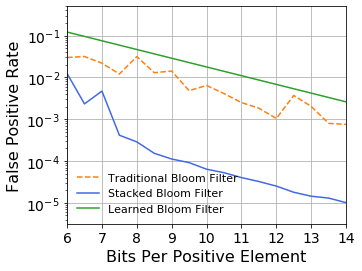

In [160]:
plt.figure(figsize=[5,4])
plt.plot(one_layer_bloom["Bits Available"], one_layer_bloom["Total FPR"], label="Traditional Bloom Filter", linestyle="--", color="tab:orange")
plt.plot(three_layer_bloom["Bits Available"],three_layer_bloom["Total FPR"], label = "Stacked Bloom Filter", color="royalblue")
plt.plot(learned_bloom["Bits Per Element"],learned_bloom["Total FPR"], label = "Learned Bloom Filter", color="tab:green")
plt.yscale("log")
plt.ylabel("False Positive Rate", fontsize=16)
plt.xlabel("Bits Per Positive Element", fontsize=16)
plt.xlim(xmin=6, xmax=14)
plt.ylim(ymax = .5, ymin=10**-5.5)
plt.legend(loc="lower left", prop={'size':11}, frameon=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.savefig('../Figures/FPR_vs_Bits_Firehose.pdf', bbox_inches='tight')
plt.show()

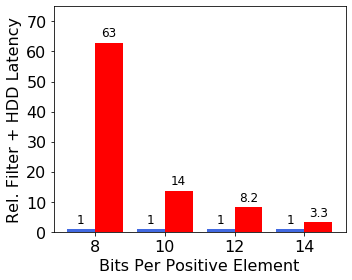

In [73]:
bits = ["8","10","12","14"]
stacked_comp_data = pd.read_csv("../Data/firehose_disk_performance_STACKED_HDD.csv")
standard_comp_data = pd.read_csv("../Data/firehose_disk_performance_TRADITIONAL_HDD_v2.csv")
negative_lookups = 1000000

trad_comp_time_total = standard_comp_data["Lookup Time"]/negative_lookups
trad_comp_time_disk = standard_comp_data["Disk Time"]/negative_lookups

stacked_comp_time_total = stacked_comp_data["Lookup Time"]/negative_lookups
stacked_comp_time_disk = stacked_comp_data["Disk Time"]/negative_lookups


# Normalize by stacked_comp_time_total
trad_comp_time_total = trad_comp_time_total/stacked_comp_time_total
trad_comp_time_disk = trad_comp_time_disk/stacked_comp_time_total
stacked_comp_time_disk = stacked_comp_time_disk/stacked_comp_time_total
stacked_comp_time_total = stacked_comp_time_total/stacked_comp_time_total

x = np.arange(len(bits))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width/2, stacked_comp_time_total, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x + width/2, trad_comp_time_total, width, label='Traditional Bloom Filter',color="tab:orange")
rects4 = ax.bar(x - width/2, stacked_comp_time_disk, width, color="darkblue")
rects5 = ax.bar(x+ width/2, trad_comp_time_disk, width ,color="red")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Rel. Filter + HDD Latency', fontsize=16)
ax.set_xlabel('Bits Per Positive Element', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(bits, fontsize=16)
plt.yticks(fontsize=16)
ax.set_ylim(ymax=75)

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2g}'.format(height, style="plain").lstrip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    style="normal",
                    ha='center', va='bottom', fontsize=12)
def autolabel0(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.0f}'.format(height, style="plain").lstrip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    style="normal",
                    ha='center', va='bottom', fontsize=12)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)


autolabel1(rects1)
autolabel1(rects2)

fig.tight_layout()
plt.savefig('../Figures/Firehose_Queries_HDD.pdf', bbox_inches='tight')

plt.show()

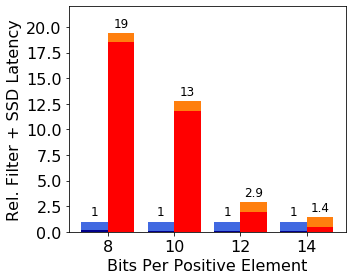

In [72]:
bits = ["8","10","12","14"]
stacked_comp_data = pd.read_csv("../Data/firehose_disk_performance_STACKED_SSD_v2.csv")
standard_comp_data = pd.read_csv("../Data/firehose_disk_performance_TRADITIONAL_SSD_v2.csv")
negative_lookups = 1000000

trad_comp_time_total = standard_comp_data["Lookup Time"]/negative_lookups
trad_comp_time_disk = standard_comp_data["Disk Time"]/negative_lookups

stacked_comp_time_total = stacked_comp_data["Lookup Time"]/negative_lookups
stacked_comp_time_disk = stacked_comp_data["Disk Time"]/negative_lookups


# Normalize by stacked_comp_time_total
trad_comp_time_total = trad_comp_time_total/stacked_comp_time_total
trad_comp_time_disk = trad_comp_time_disk/stacked_comp_time_total
stacked_comp_time_disk = stacked_comp_time_disk/stacked_comp_time_total
stacked_comp_time_total = stacked_comp_time_total/stacked_comp_time_total

x = np.arange(len(bits))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width/2, stacked_comp_time_total, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x + width/2, trad_comp_time_total, width, label='Traditional Bloom Filter',color="tab:orange")
rects4 = ax.bar(x - width/2, stacked_comp_time_disk, width, color="darkblue")
rects5 = ax.bar(x+ width/2, trad_comp_time_disk, width ,color="red")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Rel. Filter + SSD Latency', fontsize=16)
ax.set_xlabel('Bits Per Positive Element', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(bits, fontsize=16)
plt.yticks(fontsize=16)
ax.set_ylim(ymax=22)

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2g}'.format(height, style="plain").lstrip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    style="normal",
                    ha='center', va='bottom', fontsize=12)
def autolabel0(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.0f}'.format(height, style="plain").lstrip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    style="normal",
                    ha='center', va='bottom', fontsize=12)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)


autolabel1(rects1)
autolabel1(rects2)

fig.tight_layout()
plt.savefig('../Figures/Firehose_Queries_SSD.pdf', bbox_inches='tight')

plt.show()

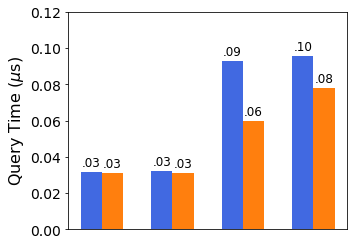

In [70]:
stacked = pd.read_csv("../Data/firehose_comp_3.csv")
stacked_positive_lookup_per_sec =  (stacked["Positive Lookup Time"])*1000000/9996
stacked_negative_lookup_per_sec =  (stacked["Negative Lookup Time"])
traditional = pd.read_csv("../Data/firehose_comp_1.csv")
traditional_positive_lookup_per_sec =  (traditional["Positive Lookup Time"])*1000000/9996
traditional_negative_lookup_per_sec =  (traditional["Negative Lookup Time"])

traditional_lookup_per_sec = [traditional_negative_lookup_per_sec[1], 
                              traditional_negative_lookup_per_sec[3],
                              traditional_positive_lookup_per_sec[1],
                              traditional_positive_lookup_per_sec[3]]
stacked_lookup_per_sec = [stacked_negative_lookup_per_sec[1],
                          stacked_negative_lookup_per_sec[3],
                          stacked_positive_lookup_per_sec[1],
                          stacked_positive_lookup_per_sec[3]]
x = np.arange(4)  # the label locations
width = 0.3 # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width/2, stacked_lookup_per_sec, width, label='Stacked Bloom Filter', color="royalblue")

rects2 = ax.bar(x + width/2, traditional_lookup_per_sec, width, label='Traditional Bloom Filter', color="tab:orange")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Query Time ($\mu$s)',fontsize=16)
ax.set_ylim(ymax=.12)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height).lstrip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

def autolabel3(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.3f}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)


autolabel(rects1)
autolabel(rects2)

plt.tick_params(
    axis='x',  
    which='both',
    bottom=False,
    top=False,        
    labelbottom=False)
plt.yticks(fontsize=14)

#fig.tight_layout()

plt.savefig('../Figures/Comp_Performance_Firehose.pdf', bbox_inches='tight')


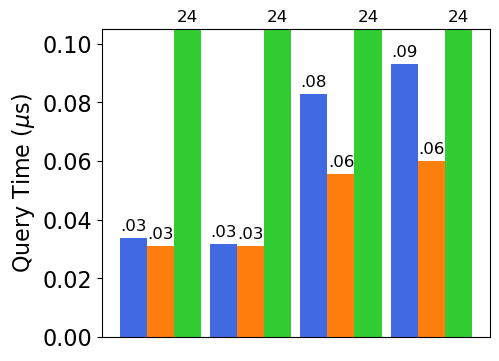

In [157]:
f, (ax) = plt.subplots(figsize=[5,4])
axis_ymax = .105

# plot the same data on both axes
stacked = pd.read_csv("../Data/firehose_comp_3.csv")
stacked_positive_lookup_per_sec =  (stacked["Positive Lookup Time"])*1000000/9996
stacked_negative_lookup_per_sec =  (stacked["Negative Lookup Time"])
traditional = pd.read_csv("../Data/firehose_comp_1.csv")
traditional_positive_lookup_per_sec =  (traditional["Positive Lookup Time"])*1000000/9996
traditional_negative_lookup_per_sec =  (traditional["Negative Lookup Time"])

traditional_lookup_per_sec = [traditional_negative_lookup_per_sec[0], 
                              traditional_negative_lookup_per_sec[1],
                              traditional_positive_lookup_per_sec[0],
                              traditional_positive_lookup_per_sec[1]]
stacked_lookup_per_sec = [stacked_negative_lookup_per_sec[0],
                          stacked_negative_lookup_per_sec[1],
                          stacked_positive_lookup_per_sec[0],
                          stacked_positive_lookup_per_sec[1]]
rae_et_al_lookup_per_sec = [24.2,24.2,24.2,24.2]
cpu_filter_lookup_per_sec = [0.003,0.003,0.003,0.003]
x = np.arange(4)  # the label locations
width = 0.3 # the width of the bars

rects1 = ax.bar(x - width, stacked_lookup_per_sec, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x , traditional_lookup_per_sec, width, label='Traditional Bloom Filter', color="tab:orange")
rects3 = ax.bar(x + width, rae_et_al_lookup_per_sec, width, label='Learned BF Rae et al. 2019 (GPU)', color="limegreen")
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel(r'Query Time ($\mu$s)', fontsize=16)

#ax.set_yticks([.025,.05,.075,.1])
ax.set_ylim(ymax=axis_ymax)
ax.tick_params(axis='y',labelsize=16,labeltop='off')

ax.set_xticks([])
ax.set_xticklabels(bits, fontsize=16)
ax.tick_params(axis='x', top="off",labeltop='off')  # don't put tick labels at the top
ax.xaxis.tick_bottom()

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value,axis_ymax)
        ax.annotate('{0:.2f}'.format(value).lstrip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value,axis_ymax)
        ax.annotate('{0:.0f}'.format(value).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

def autolabel3(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value,axis_ymax)
        ax.annotate('{0:.3f}'.format(value).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

autolabel1(rects1)
autolabel1(rects2)
autolabel2(rects3)



# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

fig.tight_layout()
plt.savefig('../Figures/Comp_Performance_Firehose.pdf', bbox_inches='tight')
plt.show()

/home/kylebd99/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:105: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


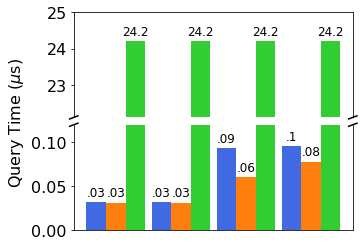

In [206]:
f, (ax2, ax) = plt.subplots(2, 1, sharex=True,figsize=[5,4])
bottom_axis_ymax = .12
top_axis_ymax = 25
top_axis_ymin = 22.1

# plot the same data on both axesstacked = pd.read_csv("../Data/url_blacklisting_stacked_performance.csv")stacked = pd.read_csv("../Data/firehose_comp_3.csv")
stacked = pd.read_csv("../Data/firehose_comp_3.csv")
stacked_positive_lookup_per_sec =  (stacked["Positive Lookup Time"])*1000000/9996
stacked_negative_lookup_per_sec =  (stacked["Negative Lookup Time"])
traditional = pd.read_csv("../Data/firehose_comp_1.csv")
traditional_positive_lookup_per_sec =  (traditional["Positive Lookup Time"])*1000000/9996
traditional_negative_lookup_per_sec =  (traditional["Negative Lookup Time"])


traditional_lookup_per_sec = [traditional_negative_lookup_per_sec[1], 
                              traditional_negative_lookup_per_sec[3],
                              traditional_positive_lookup_per_sec[1],
                              traditional_positive_lookup_per_sec[3]]
stacked_lookup_per_sec = [stacked_negative_lookup_per_sec[1],
                          stacked_negative_lookup_per_sec[3],
                          stacked_positive_lookup_per_sec[1],
                          stacked_positive_lookup_per_sec[3]]
rae_et_al_lookup_per_sec = [24.2,24.2,24.2,24.2]
cpu_filter_lookup_per_sec = [0.003,0.003,0.003,0.003]
x = np.arange(4)  # the label locations
width = 0.3 # the width of the bars

rects1 = ax.bar(x - width, stacked_lookup_per_sec, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x , traditional_lookup_per_sec, width, label='Traditional Bloom Filter', color="tab:orange")
rects3 = ax.bar(x + width, rae_et_al_lookup_per_sec, width, label='Learned BF Rae et al. 2019 (GPU)', color="limegreen")
rects1_2 = ax2.bar(x - width, stacked_lookup_per_sec, width, label='Stacked Bloom Filter', color="royalblue")
rects2_2 = ax2.bar(x , traditional_lookup_per_sec, width, label='Traditional Bloom Filter', color="tab:orange")
rects3_2 = ax2.bar(x + width, rae_et_al_lookup_per_sec, width, label='Learned BF Rae et al. 2019 (GPU)', color="limegreen")

# Add some text for labels, title and custom x-axis tick labels, etc.
f.text(-.06, 0.5,r'Query Time ($\mu$s)', va='center', rotation='vertical', fontsize=16)

#ax.set_yticks([.025,.05,.075,.1])
ax.set_ylim(ymax=bottom_axis_ymax)
ax2.set_ylim(ymin=top_axis_ymin, ymax=top_axis_ymax)
ax.tick_params(axis='y',labelsize=16,labeltop='off')
ax2.tick_params(axis='y',labelsize=16,labeltop='off')

ax.set_xticks([])
ax.set_xticklabels(bits, fontsize=16)
ax.tick_params(axis='x', top="off",labeltop='off')  # don't put tick labels at the top
ax.xaxis.tick_bottom()
ax2.xaxis.tick_top()

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.1g}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

def autolabel3(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.3f}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

autolabel1(rects1)
autolabel1(rects2)
autolabel0(rects3_2)



# hide the spines between ax and ax2
ax2.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax.transAxes)  # switch to the bottom axes
ax.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
f.subplots_adjust(hspace=0.07)
# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

fig.tight_layout()
plt.savefig('../Figures/Comp_Performance_Firehose.pdf', bbox_inches='tight')
plt.show()

----------------------------------------------------------Adaptive Experiments---------------------------------------------------------------------------------------------------------------

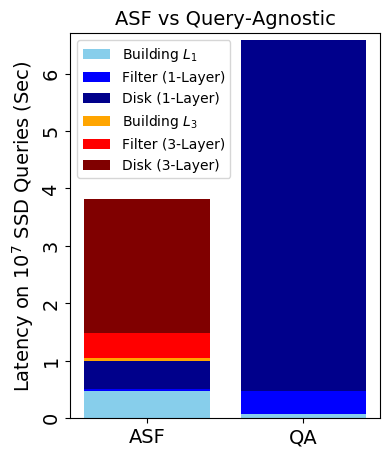

In [100]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_ssd_10_10mil_v1.csv")
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(4,5))

ylabels = ('ASF', 'QA')
y_pos = np.arange(len(ylabels))
row_idx = 0

cold_construction = [adaptive_data["Cold Construction Adaptive"].iloc[row_idx], adaptive_data["Construction Traditional"].iloc[row_idx]]
cold_lookup = [adaptive_data["Cold Lookup Adaptive"].iloc[row_idx], adaptive_data["Lookup Traditional"].iloc[row_idx]]
cold_disk = [adaptive_data["Cold Disk Adaptive"].iloc[row_idx], adaptive_data["Disk Traditional"].iloc[row_idx]]
warm_construction = [adaptive_data["Warm Construction Adaptive"].iloc[row_idx], 0]
warm_lookup = [adaptive_data["Warm Lookup Adaptive"].iloc[row_idx], 0]
warm_disk = [adaptive_data["Warm Disk Adaptive"].iloc[row_idx], 0]

ax.bar(y_pos, cold_construction, align='center', color="skyblue", label=R'Building $L_1$' )
ax.bar(y_pos, cold_lookup, bottom=cold_construction, align='center', color="blue", label=R'Filter (1-Layer)')
ax.bar(y_pos, cold_disk, bottom=np.array(cold_construction)+np.array(cold_lookup), align='center', color="darkblue", label=R'Disk (1-Layer)')
ax.bar(y_pos, warm_construction, bottom=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk), align='center', color="orange", label=R'Building $L_3$')
ax.bar(y_pos, warm_lookup,  bottom=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk)+np.array(warm_construction), align='center', color="red", label=R'Filter (3-Layer)')
ax.bar(y_pos, warm_disk, bottom=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk)+np.array(warm_construction)+np.array(warm_lookup), align='center', color="maroon", label="Disk (3-Layer)")
ax.set_xticks(y_pos)
ax.set_xticklabels(ylabels, fontsize=14)
#ax.invert_xaxis()  # labels read top-to-bottom
ax.set_ylabel(r'Latency on $10^7$ SSD Queries (Sec)', fontsize=14)
ax.set_title(r'ASF vs Query-Agnostic', fontsize=14)
plt.yticks(rotation=90, va="center", fontsize=14)
plt.ylim(ymax=6.7)
plt.legend(loc="upper left",ncol=1)
plt.savefig('../Figures/adaptive_SSD_lifecycle.pdf', bbox_inches='tight')
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'barv'

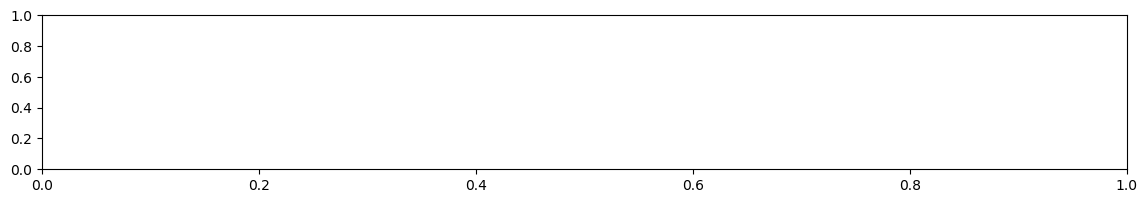

In [28]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_ssd_10_10mil_v1.csv")
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(14,2))

ylabels = ('ASF', 'BF')
y_pos = np.arange(len(ylabels))
row_idx = 0

cold_construction = [adaptive_data["Cold Construction Adaptive"].iloc[row_idx], adaptive_data["Construction Traditional"].iloc[row_idx]]
cold_lookup = [adaptive_data["Cold Lookup Adaptive"].iloc[row_idx], adaptive_data["Lookup Traditional"].iloc[row_idx]]
cold_disk = [adaptive_data["Cold Disk Adaptive"].iloc[row_idx], adaptive_data["Disk Traditional"].iloc[row_idx]]
warm_construction = [adaptive_data["Warm Construction Adaptive"].iloc[row_idx], 0]
warm_lookup = [adaptive_data["Warm Lookup Adaptive"].iloc[row_idx], 0]
warm_disk = [adaptive_data["Warm Disk Adaptive"].iloc[row_idx], 0]

ax.barh(y_pos, cold_construction, align='center', color="royalblue", label="Cold Construction")
ax.barh(y_pos, cold_lookup, left=cold_construction, align='center', color="blue", label="Cold Filter Lookups")
ax.barh(y_pos, cold_disk, left=np.array(cold_construction)+np.array(cold_lookup), align='center', color="darkblue", label="Cold Disk Reads")
ax.barh(y_pos, warm_construction, left=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk), align='center', color="crimson", label="Warm Construction")
ax.barh(y_pos, warm_lookup,  left=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk)+np.array(warm_construction), align='center', color="red", label="Warm Filter Lookups")
ax.barh(y_pos, warm_disk, left=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk)+np.array(warm_construction)+np.array(warm_lookup), align='center', color="darkred", label="Warm Disk Reads")
ax.set_yticks(y_pos)
ax.set_yticklabels(ylabels)
ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_xlabel('Latency (Sec)')
ax.set_title('Adaptive Stacked Filters vs Traditional Bloom Filter on 10 Million SSD Queries', fontsize=14)
plt.yticks(rotation=90, va="center", fontsize=14)
plt.xlim(xmax=7)
plt.legend(ncol=2)
plt.savefig('../Figures/adaptive_SSD_lifecycle.pdf', bbox_inches='tight')
plt.show()

In [5]:
adaptive_data

Positives Size  Total Queries  Negative Universe Size  \
1713331        10000000            NaN                10000000   

         Max Sample Size  False Positives Chosen  Sample Queries  \
1713331         10000000                    9938  14031467038154   

          Bits Available  Used Bits Adaptive  Cold Construction Adaptive  \
1713331                8             7.96355                    0.498174   

         Warm Construction Adaptive  ...  Warm Lookup Adaptive  \
1713331                    0.224162  ...              0.989189   

         Cold Disk Adaptive  Warm Disk Adaptive  Cold FPR Adaptive  \
1713331             2.15269              6.3504           0.025039   

         Warm FPR Adaptive  Used Bits Traditional  Construction Traditional  \
1713331           0.007524                      8                  0.243726   

         Lookup Traditional  Disk Traditional  FPR Traditional  
1713331             0.85586           17.9932         0.019557  

[1 rows x 21 columns]

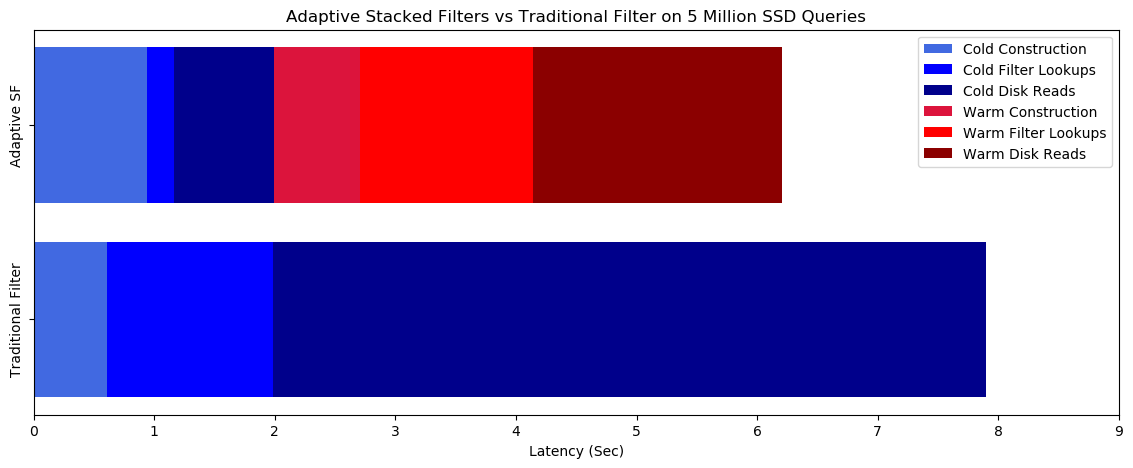

In [6]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_SSD_8_v5mil.csv")
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(14,5))

ylabels = ('Adaptive SF', 'Traditional Filter')
y_pos = np.arange(len(ylabels))
row_idx = 0

cold_construction = [adaptive_data["Cold Construction Adaptive"].iloc[row_idx], adaptive_data["Construction Traditional"].iloc[row_idx]]
cold_lookup = [adaptive_data["Cold Lookup Adaptive"].iloc[row_idx], adaptive_data["Lookup Traditional"].iloc[row_idx]]
cold_disk = [adaptive_data["Cold Disk Adaptive"].iloc[row_idx], adaptive_data["Disk Traditional"].iloc[row_idx]]
warm_construction = [adaptive_data["Warm Construction Adaptive"].iloc[row_idx], 0]
warm_lookup = [adaptive_data["Warm Lookup Adaptive"].iloc[row_idx], 0]
warm_disk = [adaptive_data["Warm Disk Adaptive"].iloc[row_idx], 0]

ax.barh(y_pos, cold_construction, align='center', color="royalblue", label="Cold Construction")
ax.barh(y_pos, cold_lookup, left=cold_construction, align='center', color="blue", label="Cold Filter Lookups")
ax.barh(y_pos, cold_disk, left=np.array(cold_construction)+np.array(cold_lookup), align='center', color="darkblue", label="Cold Disk Reads")
ax.barh(y_pos, warm_construction, left=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk), align='center', color="crimson", label="Warm Construction")
ax.barh(y_pos, warm_lookup,  left=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk)+np.array(warm_construction), align='center', color="red", label="Warm Filter Lookups")
ax.barh(y_pos, warm_disk, left=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk)+np.array(warm_construction)+np.array(warm_lookup), align='center', color="darkred", label="Warm Disk Reads")
ax.set_yticks(y_pos)
ax.set_yticklabels(ylabels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Latency (Sec)')
ax.set_title('Adaptive Stacked Filters vs Traditional Filter on 5 Million SSD Queries')
plt.yticks(rotation=90, va="center")
plt.xlim(xmax=9)
plt.legend()
plt.savefig('../Figures/adaptive_SSD_lifecycle_5mil.pdf', bbox_inches='tight')
plt.show()

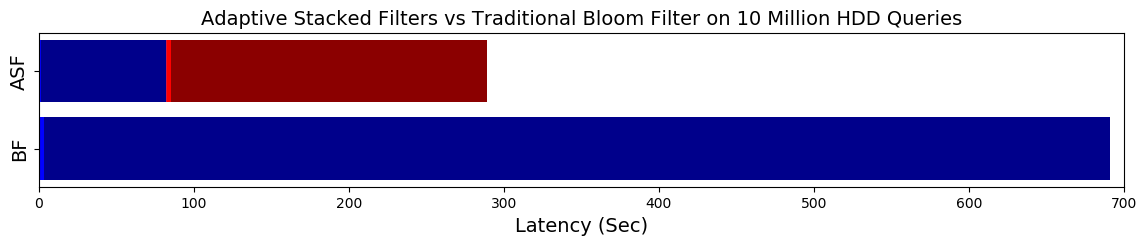

In [52]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_HDD_10_v1.csv")
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(14,2))

ylabels = ('ASF', 'BF')
y_pos = np.arange(len(ylabels))
row_idx = 0

cold_construction = [adaptive_data["Cold Construction Adaptive"].iloc[row_idx], adaptive_data["Construction Traditional"].iloc[row_idx]]
cold_lookup = [adaptive_data["Cold Lookup Adaptive"].iloc[row_idx], adaptive_data["Lookup Traditional"].iloc[row_idx]]
cold_disk = [adaptive_data["Cold Disk Adaptive"].iloc[row_idx], adaptive_data["Disk Traditional"].iloc[row_idx]]
warm_construction = [adaptive_data["Warm Construction Adaptive"].iloc[row_idx], 0]
warm_lookup = [adaptive_data["Warm Lookup Adaptive"].iloc[row_idx], 0]
warm_disk = [adaptive_data["Warm Disk Adaptive"].iloc[row_idx], 0]

ax.barh(y_pos, cold_construction, align='center', color="royalblue", label="Cold Construction")
ax.barh(y_pos, cold_lookup, left=cold_construction, align='center', color="blue", label="Cold Filter Lookups")
ax.barh(y_pos, cold_disk, left=np.array(cold_construction)+np.array(cold_lookup), align='center', color="darkblue", label="Cold Disk Reads")
ax.barh(y_pos, warm_construction, left=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk), align='center', color="crimson", label="Warm Construction")
ax.barh(y_pos, warm_lookup,  left=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk)+np.array(warm_construction), align='center', color="red", label="Warm Filter Lookups")
ax.barh(y_pos, warm_disk, left=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk)+np.array(warm_construction)+np.array(warm_lookup), align='center', color="darkred", label="Warm Disk Reads")
ax.set_yticks(y_pos)
ax.set_yticklabels(ylabels)
ax.invert_yaxis()
ax.set_xlabel('Latency (Sec)', fontsize=14)
ax.set_title('Adaptive Stacked Filters vs Traditional Bloom Filter on 10 Million HDD Queries', fontsize=14)
plt.yticks(rotation=90, va="center", fontsize=14)
plt.xlim(xmax=700)
plt.savefig('../Figures/adaptive_HDD_lifecycle.pdf', bbox_inches='tight')
plt.show()

In [4]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_ssd_8_10mil_test.csv")

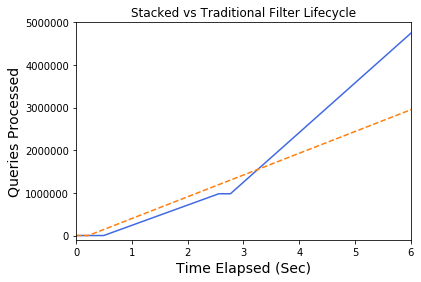

In [68]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_ssd_8_10mil_test.csv")
cold_queries=adaptive_data["Sample Queries"]
total_queries=adaptive_data["Total Queries"]
cold_construction = adaptive_data["Cold Construction Adaptive"].iloc[0]
cold_run = cold_construction + adaptive_data["Cold Lookup Adaptive"].iloc[0] + adaptive_data["Cold Disk Adaptive"].iloc[0]
warm_construction = cold_run+adaptive_data["Warm Construction Adaptive"].iloc[0]
warm_run = warm_construction + adaptive_data["Warm Lookup Adaptive"].iloc[0] + adaptive_data["Warm Disk Adaptive"].iloc[0]
stacked_queries = [0,0,cold_queries,cold_queries,total_queries]
stacked_time = [0,cold_construction, cold_run, warm_construction, warm_run]
traditional_construction = adaptive_data["Construction Traditional"].iloc[0]
traditional_run = traditional_construction+ adaptive_data["Lookup Traditional"].iloc[0] + adaptive_data["Disk Traditional"].iloc[0]
traditional_queries = [0,0,total_queries]
traditional_time = [0,traditional_construction, traditional_run]
plt.plot(stacked_time,stacked_queries, label = "Stacked Bloom Filter", color="royalblue")
plt.plot(traditional_time, traditional_queries, label="Traditional Bloom Filter", linestyle="--", color="tab:orange")
plt.xlim(xmin=0,xmax=6)
plt.ylim(ymin=-100000, ymax=5*10**6)
plt.ylabel("Queries Processed", fontsize=14)
plt.xlabel("Time Elapsed (Sec)", fontsize=14)
plt.title("Stacked vs Traditional Filter Lifecycle")
plt.show()

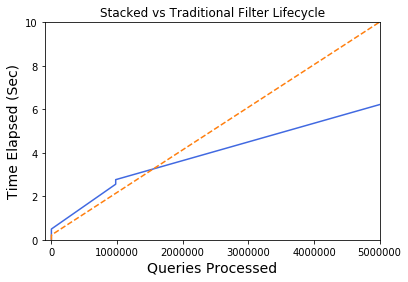

In [69]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_ssd_8_10mil_test.csv")
cold_queries=adaptive_data["Sample Queries"]
total_queries=adaptive_data["Total Queries"]
cold_construction = adaptive_data["Cold Construction Adaptive"].iloc[0]
cold_run = cold_construction + adaptive_data["Cold Lookup Adaptive"].iloc[0] + adaptive_data["Cold Disk Adaptive"].iloc[0]
warm_construction = cold_run+adaptive_data["Warm Construction Adaptive"].iloc[0]
warm_run = warm_construction + adaptive_data["Warm Lookup Adaptive"].iloc[0] + adaptive_data["Warm Disk Adaptive"].iloc[0]
stacked_queries = [0,0,cold_queries,cold_queries,total_queries]
stacked_time = [0,cold_construction, cold_run, warm_construction, warm_run]
traditional_construction = adaptive_data["Construction Traditional"].iloc[0]
traditional_run = traditional_construction+ adaptive_data["Lookup Traditional"].iloc[0] + adaptive_data["Disk Traditional"].iloc[0]
traditional_queries = [0,0,total_queries]
traditional_time = [0,traditional_construction, traditional_run]
plt.plot(stacked_queries,stacked_time, label = "Stacked Bloom Filter", color="royalblue")
plt.plot(traditional_queries, traditional_time, label="Traditional Bloom Filter", linestyle="--", color="tab:orange")
plt.ylim(ymin=0,ymax=10)
plt.xlim(xmin=-100000, xmax=5*10**6)
plt.xlabel("Queries Processed", fontsize=14)
plt.ylabel("Time Elapsed (Sec)", fontsize=14)
plt.title("Stacked vs Traditional Filter Lifecycle")
plt.show()

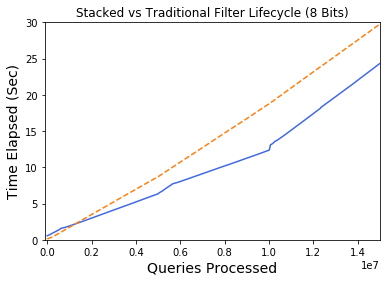

In [13]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_stages_ssd_8_15mil_v1.csv")
stacked_time = adaptive_data["Adaptive Timestamps"]
stacked_queries = adaptive_data["Adaptive Queries"]
traditional_time = adaptive_data["Traditional Timestamps"]
traditional_queries = adaptive_data["Traditional Queries"]
plt.plot(stacked_queries,stacked_time, label = "Stacked Bloom Filter", color="royalblue")
plt.plot( traditional_queries, traditional_time,label="Traditional Bloom Filter", linestyle="--", color="tab:orange")
plt.ylim(ymin=0,ymax=30)
plt.xlim(xmin=-100000, xmax=15*10**6)
plt.xlabel("Queries Processed", fontsize=14)
plt.ylabel("Time Elapsed (Sec)", fontsize=14)
plt.title("Stacked vs Traditional Filter Lifecycle (8 Bits)")
plt.show()

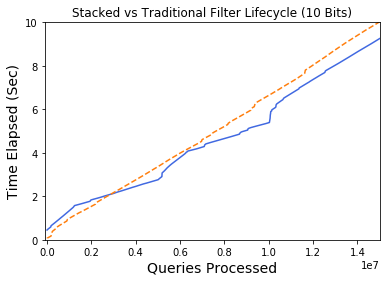

In [42]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_stages_ssd_10_15mil_v1.csv")
stacked_time = adaptive_data["Adaptive Timestamps"]
stacked_queries = adaptive_data["Adaptive Queries"]
traditional_time = adaptive_data["Traditional Timestamps"]
traditional_queries = adaptive_data["Traditional Queries"]
plt.plot(stacked_queries,stacked_time, label = "Stacked Bloom Filter", color="royalblue")
plt.plot( traditional_queries, traditional_time,label="Traditional Bloom Filter", linestyle="--", color="tab:orange")
plt.ylim(ymin=0,ymax=10)
plt.xlim(xmin=-100000, xmax=15*10**6)
plt.xlabel("Queries Processed", fontsize=14)
plt.ylabel("Time Elapsed (Sec)", fontsize=14)
plt.title("Stacked vs Traditional Filter Lifecycle (10 Bits)")
plt.show()

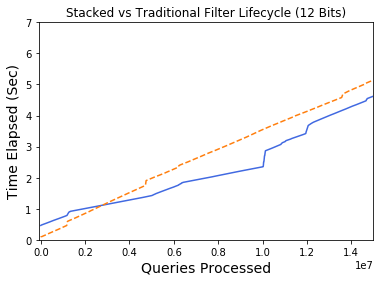

In [41]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_stages_ssd_12_15mil_v1.csv")
stacked_time = adaptive_data["Adaptive Timestamps"]
stacked_queries = adaptive_data["Adaptive Queries"]
traditional_time = adaptive_data["Traditional Timestamps"]
traditional_queries = adaptive_data["Traditional Queries"]
plt.plot(stacked_queries,stacked_time, label = "Stacked Bloom Filter", color="royalblue")
plt.plot( traditional_queries, traditional_time,label="Traditional Bloom Filter", linestyle="--", color="tab:orange")
plt.ylim(ymin=0,ymax=7)
plt.xlim(xmin=-100000, xmax=15*10**6)
plt.xlabel("Queries Processed", fontsize=14)
plt.ylabel("Time Elapsed (Sec)", fontsize=14)
plt.title("Stacked vs Traditional Filter Lifecycle (12 Bits)")
plt.show()

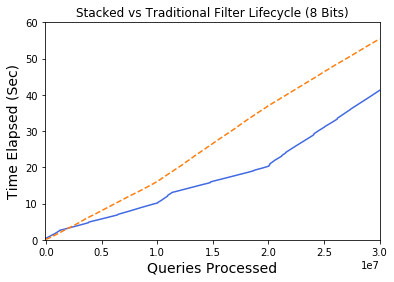

In [71]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_stages_ssd_8_30mil_v1.csv")
stacked_time = adaptive_data["Adaptive Timestamps"]
stacked_queries = adaptive_data["Adaptive Queries"]
traditional_time = adaptive_data["Traditional Timestamps"]
traditional_queries = adaptive_data["Traditional Queries"]
plt.plot(stacked_queries,stacked_time, label = "Stacked Bloom Filter", color="royalblue")
plt.plot( traditional_queries, traditional_time,label="Traditional Bloom Filter", linestyle="--", color="tab:orange")
plt.ylim(ymin=0,ymax=60)
plt.xlim(xmin=-100000, xmax=30*10**6)
plt.xlabel("Queries Processed", fontsize=14)
plt.ylabel("Time Elapsed (Sec)", fontsize=14)
plt.title("Stacked vs Traditional Filter Lifecycle (8 Bits)")
plt.savefig('../Figures/adaptive_stages_30mil_8bits.pdf', bbox_inches='tight')
plt.show()

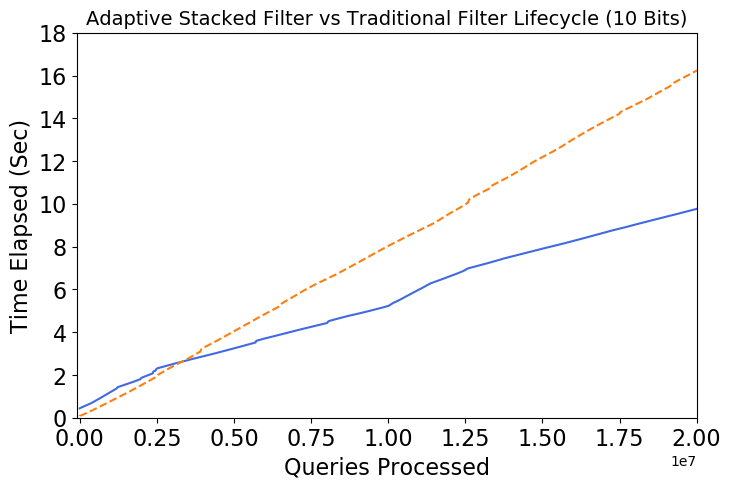

In [292]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_stages_ssd_10_30mil_v2.csv")
stacked_time = adaptive_data["Adaptive Timestamps"]
stacked_queries = adaptive_data["Adaptive Queries"]
traditional_time = adaptive_data["Traditional Timestamps"]
traditional_queries = adaptive_data["Traditional Queries"]
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(stacked_queries,stacked_time, label = "Adaptive Stacked Filter", color="royalblue")
plt.plot( traditional_queries, traditional_time,label="Traditional Bloom Filter", linestyle="--", color="tab:orange")
plt.ylim(ymin=0,ymax=18)
plt.xlim(xmin=-100000, xmax=20*10**6)
plt.xlabel("Queries Processed", fontsize=16)
plt.ylabel("Time Elapsed (Sec)", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title("Adaptive Stacked Filter vs Traditional Filter Lifecycle (10 Bits)", fontsize=14)
plt.savefig('../Figures/adaptive_stages_30mil_10bits.pdf', bbox_inches='tight')
plt.show()

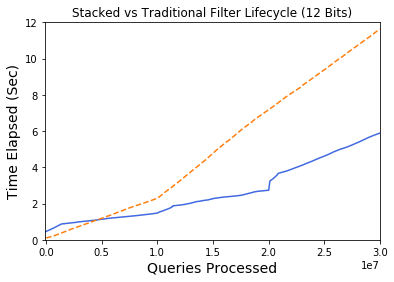

In [73]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_stages_ssd_12_30mil_v1.csv")
stacked_time = adaptive_data["Adaptive Timestamps"]
stacked_queries = adaptive_data["Adaptive Queries"]
traditional_time = adaptive_data["Traditional Timestamps"]
traditional_queries = adaptive_data["Traditional Queries"]
plt.plot(stacked_queries,stacked_time, label = "Stacked Bloom Filter", color="royalblue")
plt.plot( traditional_queries, traditional_time,label="Traditional Bloom Filter", linestyle="--", color="tab:orange")
plt.ylim(ymin=0,ymax=12)
plt.xlim(xmin=-100000, xmax=30*10**6)
plt.xlabel("Queries Processed", fontsize=14)
plt.ylabel("Time Elapsed (Sec)", fontsize=14)
plt.title("Stacked vs Traditional Filter Lifecycle (12 Bits)")
plt.savefig('../Figures/adaptive_stages_30mil_12bits.pdf', bbox_inches='tight')
plt.show()

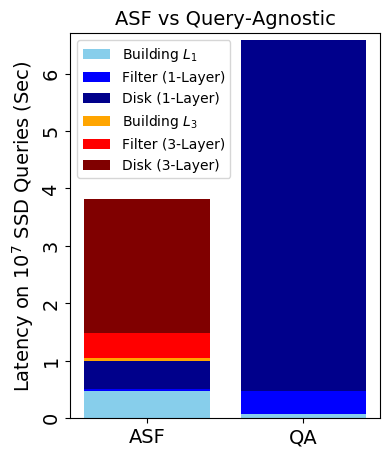

In [229]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_ssd_10_10mil_v1.csv")
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(4,5))

ylabels = ('ASF', 'QA')
y_pos = np.arange(len(ylabels))
row_idx = 0

cold_construction = [adaptive_data["Cold Construction Adaptive"].iloc[row_idx], adaptive_data["Construction Traditional"].iloc[row_idx]]
cold_lookup = [adaptive_data["Cold Lookup Adaptive"].iloc[row_idx], adaptive_data["Lookup Traditional"].iloc[row_idx]]
cold_disk = [adaptive_data["Cold Disk Adaptive"].iloc[row_idx], adaptive_data["Disk Traditional"].iloc[row_idx]]
warm_construction = [adaptive_data["Warm Construction Adaptive"].iloc[row_idx], 0]
warm_lookup = [adaptive_data["Warm Lookup Adaptive"].iloc[row_idx], 0]
warm_disk = [adaptive_data["Warm Disk Adaptive"].iloc[row_idx], 0]

ax.bar(y_pos, cold_construction, align='center', color="skyblue", label=R'Building $L_1$' )
ax.bar(y_pos, cold_lookup, bottom=cold_construction, align='center', color="blue", label=R'Filter (1-Layer)')
ax.bar(y_pos, cold_disk, bottom=np.array(cold_construction)+np.array(cold_lookup), align='center', color="darkblue", label=R'Disk (1-Layer)')
ax.bar(y_pos, warm_construction, bottom=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk), align='center', color="orange", label=R'Building $L_3$')
ax.bar(y_pos, warm_lookup,  bottom=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk)+np.array(warm_construction), align='center', color="red", label=R'Filter (3-Layer)')
ax.bar(y_pos, warm_disk, bottom=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk)+np.array(warm_construction)+np.array(warm_lookup), align='center', color="maroon", label="Disk (3-Layer)")
ax.set_xticks(y_pos)
ax.set_xticklabels(ylabels, fontsize=14)
#ax.invert_xaxis()  # labels read top-to-bottom
ax.set_ylabel(r'Latency on $10^7$ SSD Queries (Sec)', fontsize=16)
plt.yticks(rotation=90, va="center", fontsize=16)
plt.ylim(ymax=6.7)
plt.legend(loc="upper left",ncol=1)
plt.savefig('../Figures/adaptive_SSD_lifecycle.pdf', bbox_inches='tight')
plt.show()

In [270]:
pd.read_csv("../Data/adaptive_experiments_HDD_10_v1.csv")

Positives Size  Total Queries  Negative Universe Size  \
1713331        10000000            NaN                10000000   

         Max Sample Size  False Positives Chosen  Bits Available  \
1713331          1000000                    3662              10   

         Used Bits Adaptive  Cold Construction Adaptive  \
1713331             9.95472                    0.956243   

         Warm Construction Adaptive  Cold Lookup Adaptive  \
1713331                    0.714564              0.286925   

         Warm Lookup Adaptive  Cold Disk Adaptive  Warm Disk Adaptive  \
1713331               2.63651             80.8183             204.041   

         Cold FPR Adaptive  Warm FPR Adaptive  Used Bits Traditional  \
1713331           0.010115           0.002808                     10   

         Construction Traditional  Lookup Traditional  Disk Traditional  \
1713331                  0.637915             2.48427           688.083   

         FPR Traditional  
1713331          0.00873

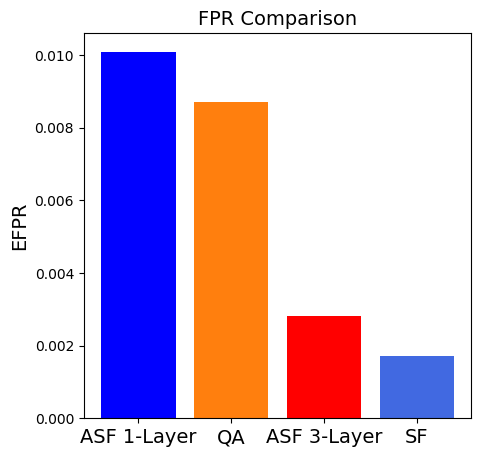

In [273]:
f,ax = plt.subplots(figsize=(5,5))

cold_fpr = .0101
warm_fpr = .002808
trad_fpr = .0087
static =.00172

ax.bar(0,cold_fpr, align='center', color="blue", label="ASF 1-Layer" )
ax.bar(1,trad_fpr, align='center', color="tab:orange", label="QA" )
ax.bar(2,warm_fpr, align='center', color="red", label="ASF 3-Layer" )
ax.bar(3,static, align='center', color="royalblue", label="Static SF" )
plt.ylabel("EFPR", fontsize=16)
xlabels = ('ASF 1-Layer', 'QA', 'ASF 3-Layer', 'SF')
x_pos = np.arange(len(xlabels))
ax.set_xticks(x_pos)
ax.set_xticklabels(xlabels, fontsize=14)
plt.title("FPR Comparison", fontsize=14)
plt.savefig('../Figures/adaptive_fpr_comparison.pdf', bbox_inches='tight')
plt.show()

In [20]:
blacklisting_learned_bloom_only_orgs = pd.read_csv("../Data/url_learned_bloom_fpr_sweep_HALF_DATA_ORGS_2.csv")

In [21]:
blacklisting_learned_bloom_only_orgs

Total FPR Orgs  Total FPR No Orgs  Size of Backup  Bits Per Element  \
0        0.000563           0.000788        19963677          12.07107   

   Number of Negatives  Zipf  
0              5000000  0.75

In [16]:
blacklisting_data_stacked = pd.read_csv("../Data/url_blacklisting_STACKED_HALF_DATA_2.csv")

In [17]:
blacklisting_data_stacked

Number Of Positive Elements  Negative Universe Size  \
0                       1713331                 9824397   
1                       1713331                 9824397   
2                       1713331                 9824397   
3                       1713331                 9824397   
4                       1713331                 9824397   
5                       1713331                 9824397   
6                       1713331                 9824397   
7                       1713331                 9824397   
8                       1713331                 9824397   
9                       1713331                 9824397   
10                      1713331                 9824397   

    Number of Known Negatives Available  Number of Known Negatives Chosen  \
0                               5000000                            269247   
1                               5000000                           1280267   
2                               5000000                           1635586   
3                               5000000                           3776835   
4                               5000000                           4999800   
5                               5000000                           4999839   
6                               5000000                           4999980   
7                               5000000                           4999999   
8                               5000000                           4999965   
9                               5000000                           4999359   
10                              5000000                           4999992   

         Psi  Bits Available  Equal Fprs  Num Layers  Used Bits  Total FPR  \
0   0.708538               4           1           5    3.98014   0.051060   
1   0.825111               5           1           3    4.97441   0.028770   
2   0.852732               6           1           3    5.97011   0.013260   
3   0.929130               7           1           3    6.96395   0.005145   
4   0.952773               8           1           5    7.96080   0.001575   
5   0.952770               9           1           5    8.95500   0.000808   
6   0.952755              10           1           3    9.94951   0.000475   
7   0.952810              11           1           5   10.94560   0.000276   
8   0.952720              12           1           3   11.94000   0.000166   
9   0.952747              13           1           3   12.93490   0.000099   
10  0.952691              14           1           3   13.93010   0.000060   

    Known FPR  Unknown FPR  Construction Time  Positive Lookup Time  \
0           0            0           0.381876              0.348488   
1           0            0           0.515380              0.351791   
2           0            0           0.548851              0.361285   
3           0            0           0.809621              0.367439   
4           0            0           0.944971              0.386017   
5           0            0           0.948682              0.395922   
6           0            0           0.939607              0.397750   
7           0            0           0.950629              0.407645   
8           0            0           0.964048              0.422049   
9           0            0           0.951085              0.416633   
10          0            0           0.966981              0.426137   

    Negative Lookup Time  Filter Checks For Positive  \
0               0.149697                           0   
1               0.141969                           0   
2               0.132193                           0   
3               0.129704                           0   
4               0.122990                           0   
5               0.124380                           0   
6               0.121546                           0   
7               0.121371                           0   
8               0.121544                           0   
9               0.11

In [38]:
blacklisting_data_traditional = pd.read_csv("../Data/url_blacklisting_TRADITIONAL.csv")

In [39]:
blacklisting_data_traditional

Number Of Positive Elements  Negative Universe Size  \
0                       1713331                 9824397   
1                       1713331                 9824397   
2                       1713331                 9824397   
3                       1713331                 9824397   
4                       1713331                 9824397   
5                       1713331                 9824397   
6                       1713331                 9824397   
7                       1713331                 9824397   
8                       1713331                 9824397   
9                       1713331                 9824397   
10                      1713331                 9824397   
11                      1713331                 9824397   
12                      1713331                 9824397   

    Number of Known Negatives Available  Number of Known Negatives Chosen  \
0                               1713331                                 0   
1                               1713331                                 0   
2                               1713331                                 0   
3                               1713331                                 0   
4                               1713331                                 0   
5                               1713331                                 0   
6                               1713331                                 0   
7                               1713331                                 0   
8                               1713331                                 0   
9                               1713331                                 0   
10                              1713331                                 0   
11                              1713331                                 0   
12                              1713331                                 0   

    Psi  Bits Available  Equal Fprs  Num Layers  Used Bits  Total FPR  \
0     0             8.0           0           1    8.01491   0.021529   
1     0             8.5           0           1    8.50086   0.017894   
2     0             9.0           0           1    9.03546   0.012317   
3     0             9.5           0           1    9.51070   0.010822   
4     0            10.0           0           1   10.00030   0.008430   
5     0            10.5           0           1   10.52800   0.008196   
6     0            11.0           0           1   11.00770   0.005096   
7     0            11.5           0           1   11.50000   0.005230   
8     0            12.0           0           1   12.02240   0.002356   
9     0            12.5           0           1   12.50550   0.001828   
10    0            13.0           0           1   13.04200   0.001819   
11    0            13.5           0           1   13.51790   0.001962   
12    0            14.0           0           1   14.00380   0.000937   

    Known FPR  Unknown FPR  Construction Time  Positive Lookup Time  \
0         NaN            0           0.258912              0.244551   
1         NaN            0           0.252788              0.256595   
2         NaN            0           0.261718              0.275655   
3         NaN            0           0.272757              0.280979   
4         NaN            0           0.279806              0.279243   
5         NaN            0           0.289004              0.289302   
6         NaN            0           0.300439              0.299101   
7         NaN            0           0.296724              0.303091   
8         NaN            0           0.319131              0.315560   
9         NaN            0           0.323227              0.320145   
10        NaN            0           0.343537              0.329791   
11        NaN            0           0.337424              0.336784   
12        NaN            0           0.351382              0.339925   

    Negative Lookup Time  Filter Checks For Positive  \
0               0.141986

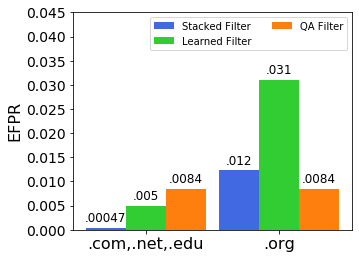

In [104]:
f,ax = plt.subplots(figsize=(5,4))
learned_fpr_no_org = .005001
learned_fpr_only_org = 0.91
trad_fpr = .008430
static_no_org =.000475
static_only_org = 0.012317
width = 0.3

rects1 = ax.bar(0 - width, static_no_org, width, label='Stacked Filter', color="royalblue")
rects2 = ax.bar(0, learned_fpr_no_org, width, label='Learned Filter', color="limegreen")
rects3 = ax.bar(0 + width, trad_fpr, width, label='QA Filter', color="tab:orange")
rects4 = ax.bar(1 - width, static_with_org, width, color="royalblue")
rects5 = ax.bar(1, learned_fpr_only_org, width, color="limegreen")
rects6 = ax.bar(1 + width, trad_fpr, width, color="tab:orange")

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2g}'.format(height).lstrip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

plt.ylabel("EFPR", fontsize=16)
xlabels = (".com,.net,.edu", ".org")
x_pos = np.arange(len(xlabels))
ax.set_xticks(x_pos)
ax.set_xticklabels(xlabels, fontsize=16)
plt.yticks(fontsize=14)
plt.ylim(ymax=.045)
plt.legend(ncol=2)
plt.savefig('../Figures/learned_robustness_org.pdf', bbox_inches='tight')
plt.show()